In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Walmart.csv')
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


1. total number of states in the given data
2.  total sample size
3.  Check datatypes of each column
4. First and last order date

In [ ]:
df['State'].unique()

array(['California', 'Washington', 'Utah', 'Arizona', 'Oregon',
       'Colorado', 'New Mexico', 'Nevada', 'Montana', 'Idaho', 'Wyoming'],
      dtype=object)

In [ ]:
df['State'].nunique()

11

In [ ]:
df['State'].value_counts()

State
California    2001
Washington     506
Arizona        224
Colorado       182
Oregon         124
Utah            53
Nevada          39
New Mexico      37
Idaho           21
Montana         15
Wyoming          1
Name: count, dtype: int64

In [ ]:
df.shape

(3203, 12)

In [ ]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Customer Name     object
Country           object
City              object
State             object
Category          object
Product Name      object
Sales            float64
Quantity         float64
Profit           float64
dtype: object

In [ ]:
print(df['Order Date'].min())
print(df['Order Date'].max())


# here we are not getting the 2011 year as show in df
# becse the dtype of order date is object
# hence converting it to the datetime data type

01-01-2014
31-12-2014


In [ ]:
# to convert the column into datetime data type
df['Order Date']=pd.to_datetime(df['Order Date'],format = '%d-%m-%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format = '%d-%m-%Y')



In [ ]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Customer Name            object
Country                  object
City                     object
State                    object
Category                 object
Product Name             object
Sales                   float64
Quantity                float64
Profit                  float64
dtype: object

In [ ]:
print(df['Order Date'].min())
print(df['Order Date'].max())

2011-01-07 00:00:00
2014-12-31 00:00:00


In [ ]:
df.head()


,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [ ]:
df['o_day']=df['Order Date'].dt.day
df['o_month']=df['Order Date'].dt.month
df['o_year']=df['Order Date'].dt.year


In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,o_day,o_month,o_year
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,13,6,2013
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,9,6,2011
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,9,6,2011
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,9,6,2011
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,9,6,2011


**define a data column representing the quarter in which order was done**

In [ ]:
def quater(month):
  if month in [4,5,6]:
    return 'Q1'
  elif month in [7,8,9]:
    return 'Q2'
  elif month in [10,11,12]:
   return 'Q3'
  else:
    return 'Q4'



In [ ]:
quater(7)

'Q2'

In [ ]:
df['Quater']=df['o_month'].apply(quater)
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,o_day,o_month,o_year,Quater
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,13,6,2013,Q1
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,9,6,2011,Q1
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,9,6,2011,Q1
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,9,6,2011,Q1
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,9,6,2011,Q1


**calculate the duration company took to ship a product**

In [ ]:
df['Ship Date']-df['Order Date']

0      4 days
1      5 days
2      5 days
3      5 days
4      5 days
        ...  
3198   4 days
3199   5 days
3200   5 days
3201   5 days
3202   5 days
Length: 3203, dtype: timedelta64[ns]

In [ ]:
df['Shipping time']=(df['Ship Date']-df['Order Date']).apply(lambda x : x.days)

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,o_day,o_month,o_year,Quater,Shipping time
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,13,6,2013,Q1,4
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,9,6,2011,Q1,5
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,9,6,2011,Q1,5
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,9,6,2011,Q1,5
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,9,6,2011,Q1,5


In [ ]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Country',
       'City', 'State', 'Category', 'Product Name', 'Sales', 'Quantity',
       'Profit', 'o_day', 'o_month', 'o_year', 'Quater', 'Shipping time'],
      dtype='object')

In [ ]:
new_order=['Order ID', 'Order Date', 'Ship Date','Shipping time','o_day', 'o_month', 'o_year', 'Quater', 'Customer Name', 'Country',
       'City', 'State', 'Category', 'Product Name', 'Sales', 'Quantity','Profit',  ]
df = df.reindex(columns=new_order)
df.head()

,Order ID,Order Date,Ship Date,Shipping time,o_day,o_month,o_year,Quater,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,4,13,6,2013,Q1,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q1,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q1,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q1,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q1,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


1. Number of product category
2. Name of each product category
3. Number of products in each category




In [ ]:
df['Category'].nunique()

17

In [ ]:
df['Category'].unique()

array(['Labels', 'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances',
       'Tables', 'Storage', 'Accessories', 'Paper', 'Chairs', 'Fasteners',
       'Supplies', 'Envelopes', 'Copiers', 'Bookcases', 'Machines'],
      dtype=object)

In [ ]:
df['Category'].value_counts()

Category
Binders        471
Paper          450
Furnishings    304
Phones         277
Storage        266
Accessories    258
Art            250
Chairs         207
Appliances     136
Labels         116
Tables         116
Bookcases       80
Fasteners       72
Supplies        69
Envelopes       67
Machines        39
Copiers         25
Name: count, dtype: int64

In [ ]:
df.groupby('Category')[['Sales','Quantity','Profit']].agg(['sum','mean','count'])

Sales                    Quantity                    Profit  \
                   sum         mean count      sum      mean count       sum   
Category                                                                       
Accessories   61114.10   236.876357   258   1032.0  4.000000   258  16484.62   
Appliances    30236.32   222.325882   136    492.0  3.617647   136   8261.29   
Art            9212.06    36.848240   250    926.0  3.704000   250   2374.15   
Binders       55961.11   118.813397   471   1868.0  3.966030   471  16096.78   
Bookcases     36004.18   450.052250    80    306.0  3.825000    80  -1646.50   
Chairs       101781.36   491.697391   207    734.0  3.545894   207   4027.62   
Copiers       49749.23  1989.969200    25     88.0  3.520000    25  19327.25   
Envelopes      4118.10    61.464179    67    227.0  3.388060    67   1908.71   
Fasteners       923.20    12.822222    72    263.0  3.652778    72    275.19   
Furnishings   30072.73    98.923454   304   1175.0  3.865132   304   7641.26   
Labels         5078.72    43.782069   116    480.0  4.137931   116   2303.07   
Machines      42444.14  1088.311282    39    147.0  3.769231    39   -618.95   
Paper         26663.73    59.252733   450   1702.0  3.782222   450  12119.10   
Phones        98684.39   356.261336   277   1066.0  3.848375   277   9111.06   
Storage       70532.84   265.161053   266   1039.0  3.906015   266   8645.49   
Supplies      18127.12   262.711884    69    238.0  3.449275    69    626.11   
Tables        84754.60   730.643103   116    481.0  4.146552   116   1482.54   

                               
                   mean count  
Category                       
Accessories   63.893876   258  
Appliances    60.744779   136  
Art            9.496600   250  
Binders       34.175754   471  
Bookcases    -20.581250    80  
Chairs        19.457101   207  
Copiers      773.090000    25  
Envelopes     28.488209    67  
Fasteners      3.822083    72  
Furnishings   25.135724   304  
Labels        19.854052   116  
Machines     -15.870513    39  
Paper         26.931333   450  
Phones        32.891913   277  
Storage       32.501842   266  
Supplies       9.074058    69  
Tables        12.780517   116

In [ ]:
table = pd.pivot_table(data = df,
                       index = 'Category',                        #grouping factor
                       values = ['Order ID', 'Sales', 	'Quantity', 	'Profit'],
                       aggfunc = {'Order ID' : pd.Series.nunique,
                                  'Profit' : np.mean,
                                  'Quantity' : np.sum,
                                  'Sales' : np.mean})

table.columns = ['Total Orders' , 'Average Profit' , 'Total Quantity' , 'Average Sales']

table = table.sort_values('Total Quantity' , ascending = False)

table

,Total Orders,Average Profit,Total Quantity,Average Sales
Category,,,,
Binders,403,34.175754,1868.0,118.813397
Paper,384,26.931333,1702.0,59.252733
Furnishings,281,25.135724,1175.0,98.923454
Phones,256,32.891913,1066.0,356.261336
Storage,247,32.501842,1039.0,265.161053
Accessories,236,63.893876,1032.0,236.876357
Art,227,9.496600,926.0,36.848240
Chairs,191,19.457101,734.0,491.697391
Appliances,134,60.744779,492.0,222.325882


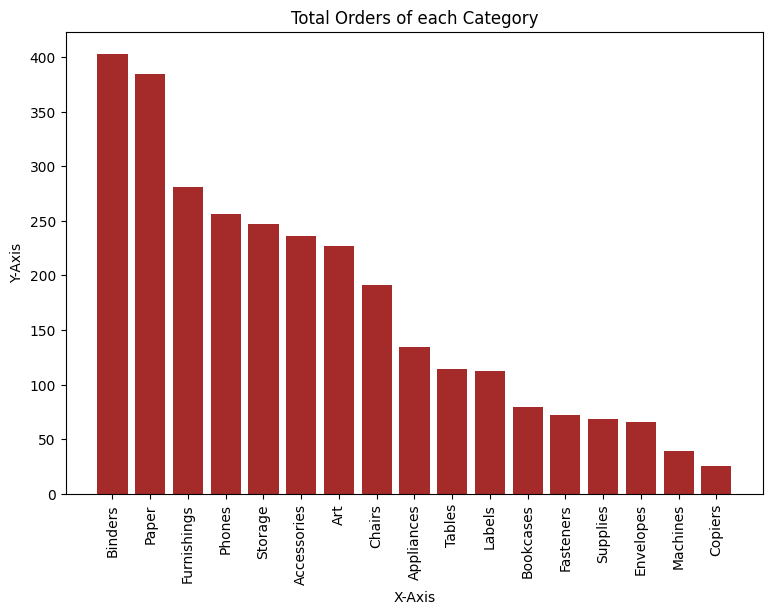

In [ ]:
plt.figure(figsize=(9,6))

plt.bar(table.index,table['Total Orders'],color='brown')
plt.xticks(rotation = 90)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Total Orders of each Category')

plt.show()


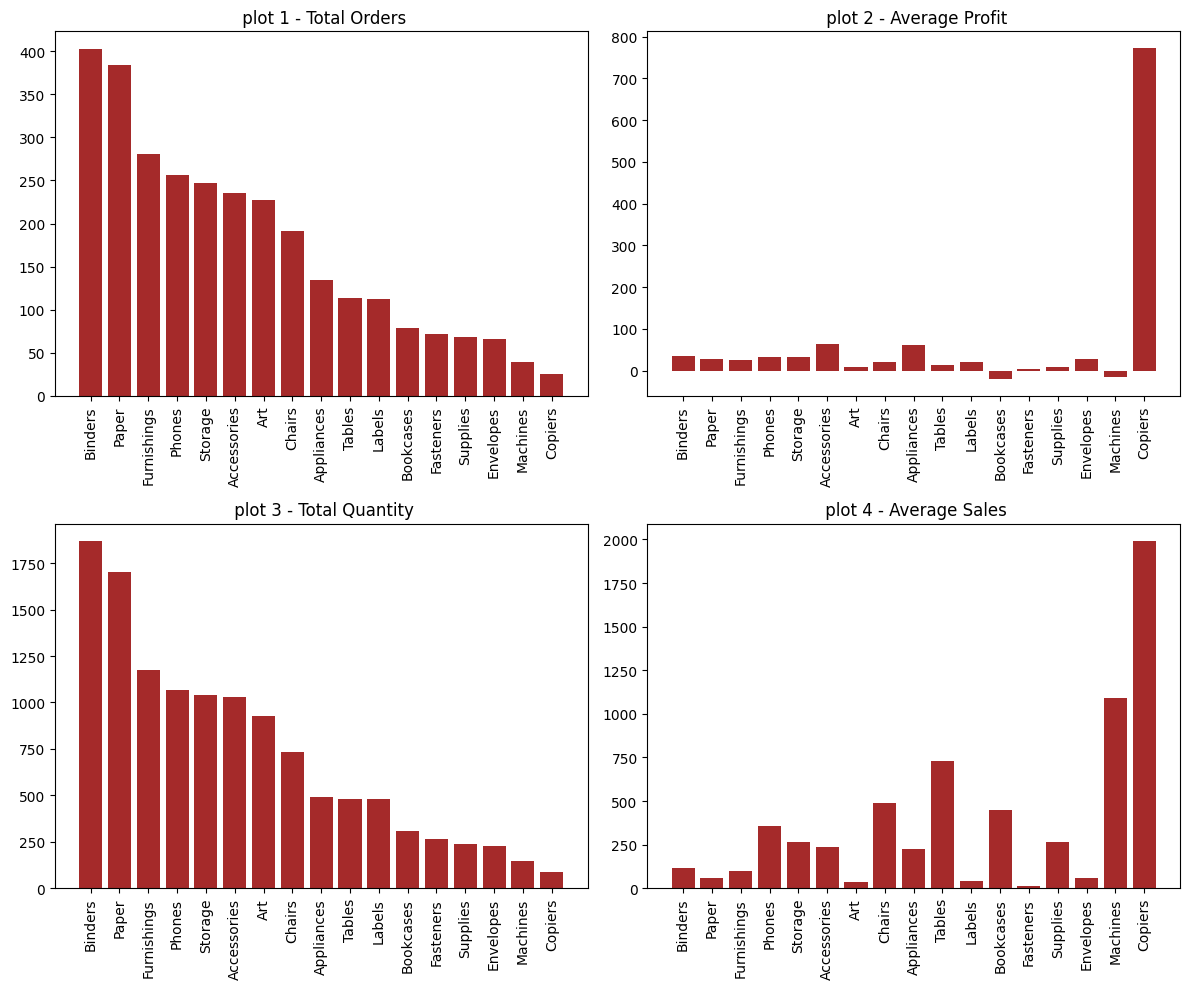

In [ ]:

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.bar(table.index,table['Total Orders'],color='brown')
plt.xticks(rotation = 90)
plt.title(' plot 1 - Total Orders')

plt.subplot(2,2,2)
plt.bar(table.index,table['Average Profit'],color='brown')
plt.xticks(rotation = 90)
plt.title(' plot 2 - Average Profit')

plt.subplot(2,2,3)
plt.bar(table.index,table['Total Quantity'],color='brown')
plt.xticks(rotation = 90)
plt.title(' plot 3 - Total Quantity')

plt.subplot(2,2,4)
plt.bar(table.index,table['Average Sales'],color='brown')
plt.xticks(rotation = 90)
plt.title(' plot 4 - Average Sales')

plt.tight_layout()
plt.show()







<Axes: ylabel='Category'>

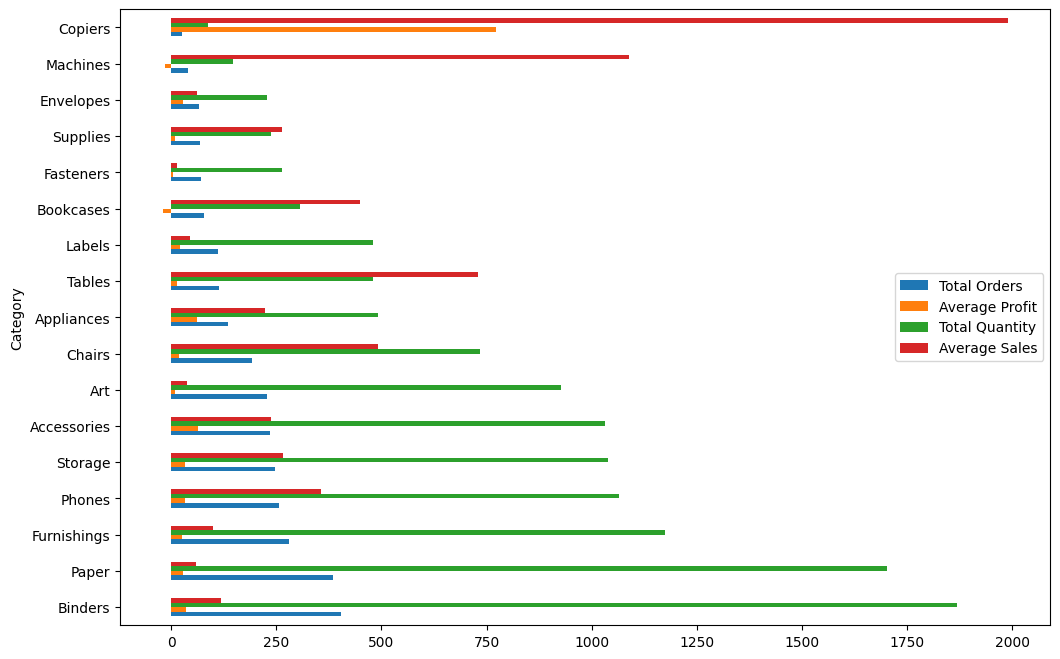

In [ ]:
table.plot.barh(figsize=(12,8))

<Axes: ylabel='Category'>

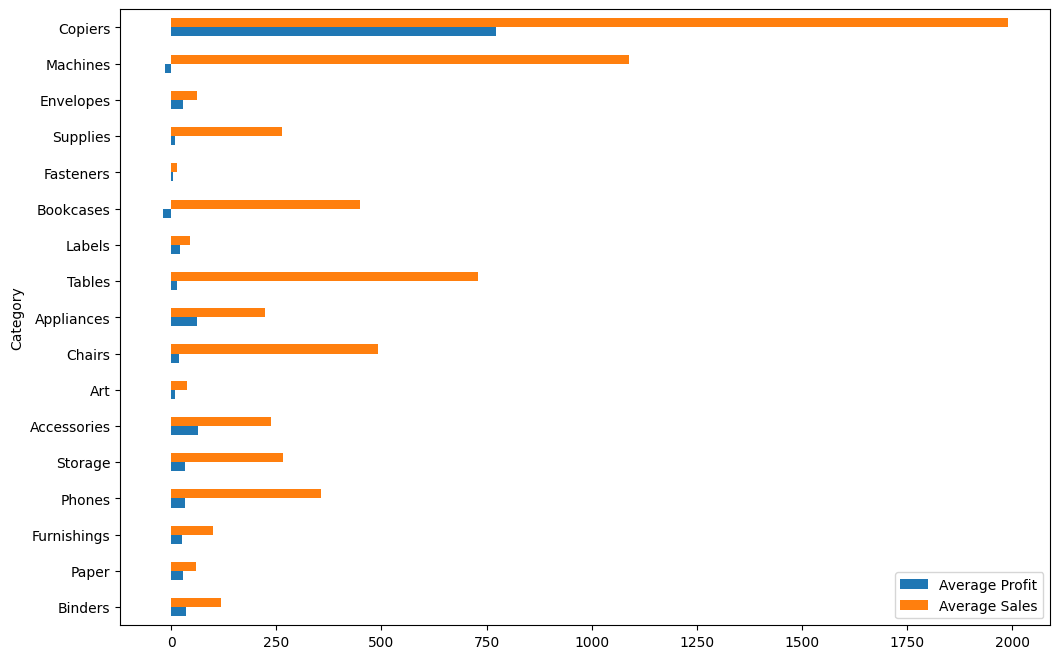

In [ ]:
table[['Average Profit','Average Sales']].plot.barh(figsize=(12,8))

**Perform Analysis for each State present in given data like it is done for each category**

In [ ]:

table_state = pd.pivot_table(data = df,
                             index = 'State',
                             values = ['Order ID', 'Quantity' , 'Sales' ,'Profit'],
                             aggfunc = {'Order ID' : pd.Series.nunique,
                                        'Quantity' : np.sum,
                                        'Sales' : [np.mean,np.sum],
                                        'Profit' : [np.mean , np.sum]})

table_state.columns = ['Total Orders' , 'Average Profit' ,
                       'Total Profit' , 'Total Quantity' ,
                       'Average Sales' , 'Total Sales']

table_state = table_state.sort_values('Total Quantity' , ascending = False)
table_state

,Total Orders,Average Profit,Total Profit,Total Quantity,Average Sales,Total Sales
State,,,,,,
California,1021,38.171714,76381.60,7665.0,228.729475,457687.68
Washington,256,66.013241,33402.70,1883.0,273.994644,138641.29
Arizona,108,-15.302991,-3427.87,862.0,157.509018,35282.02
Colorado,79,-35.867363,-6527.86,693.0,176.418242,32108.12
Oregon,56,-9.600645,-1190.48,499.0,140.573710,17431.14
Utah,26,48.048302,2546.56,219.0,211.699245,11220.06
Nevada,23,85.045128,3316.76,168.0,428.951282,16729.10
New Mexico,22,31.273784,1157.13,151.0,129.284865,4783.54
Idaho,11,39.368095,826.73,64.0,208.690000,4382.49


<Axes: ylabel='Category'>

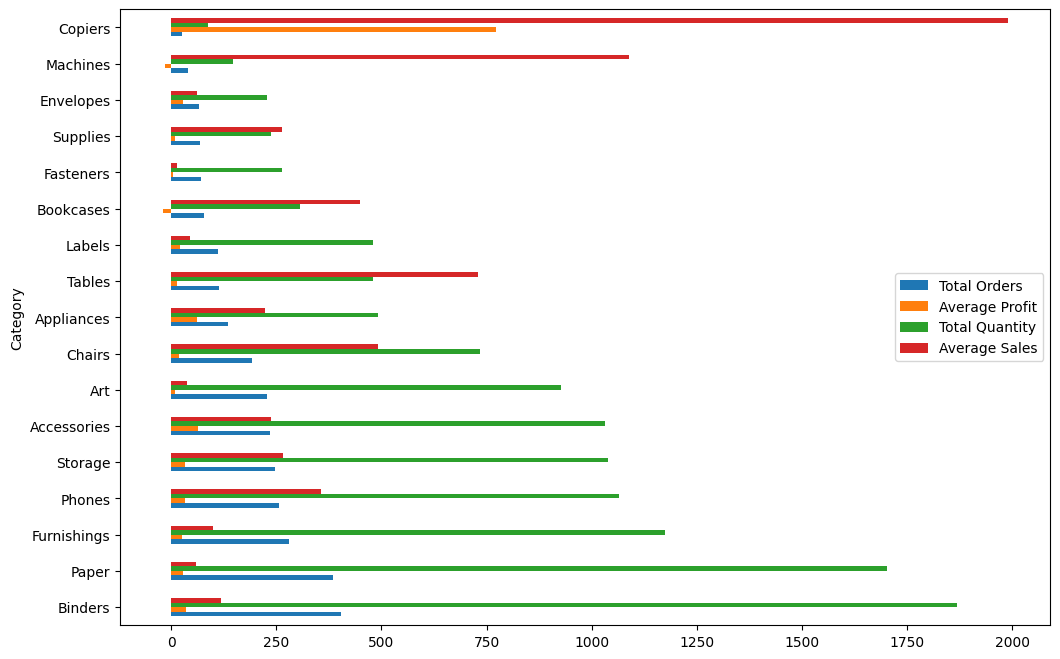

In [ ]:
table.plot.barh(figsize=(12,8))

In [ ]:
table_state.columns

Index(['Total Orders', 'Average Profit', 'Total Profit', 'Total Quantity',
       'Average Sales', 'Total Sales'],
      dtype='object')

<Axes: ylabel='State'>

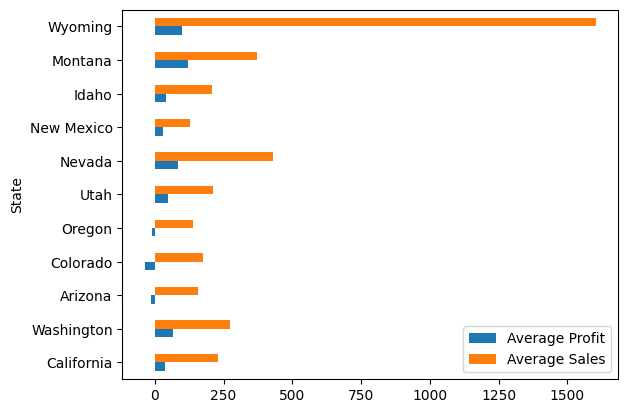

In [ ]:
table_state[['Average Profit','Average Sales']].plot.barh()

<Axes: ylabel='State'>

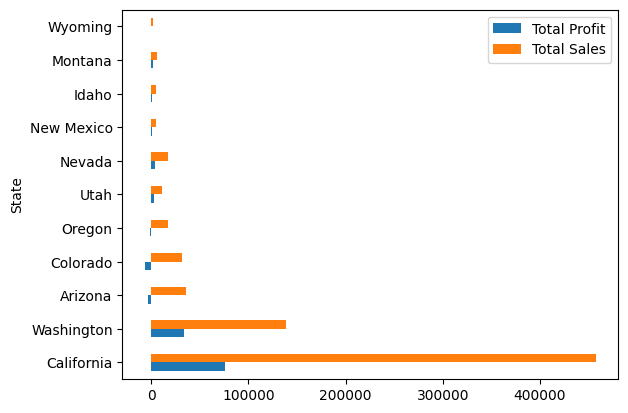

In [ ]:
import pandas as pd
table_state[['Total Profit' , 'Total Sales']].plot.barh()


<Axes: ylabel='State'>

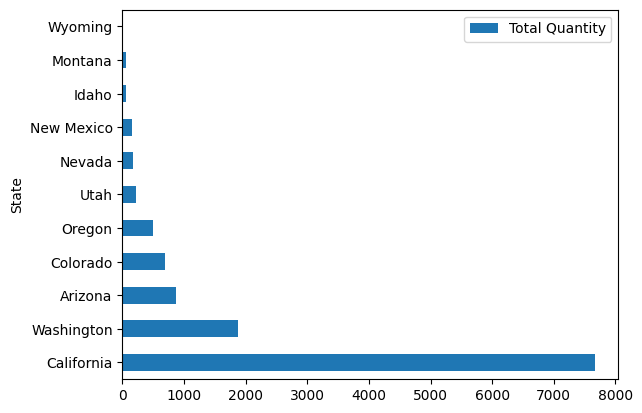

In [ ]:
table_state[['Total Quantity']].plot.barh()

* Analyze Number product sold from each category in each state

In [ ]:
df.groupby(['State','Category'])['Quantity'].sum()

State       Category   
Arizona     Accessories     85.0
            Appliances      21.0
            Art             47.0
            Binders        155.0
            Bookcases       18.0
                           ...  
Washington  Phones         116.0
            Storage        182.0
            Supplies        30.0
            Tables         109.0
Wyoming     Chairs           4.0
Name: Quantity, Length: 141, dtype: float64

In [ ]:
state_quantity=df.groupby(['State','Category'])['Quantity'].sum().unstack().fillna(0)
state_quantity

Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
State,,,,,,,,,,,,,,,,,
Arizona,85.0,21.0,47.0,155.0,18.0,52.0,0.0,28.0,23.0,82.0,9.0,9.0,124.0,79.0,78.0,16.0,36.0
California,568.0,346.0,644.0,1057.0,198.0,466.0,60.0,149.0,148.0,751.0,349.0,86.0,1091.0,689.0,637.0,145.0,281.0
Colorado,76.0,38.0,32.0,112.0,41.0,53.0,1.0,16.0,12.0,92.0,5.0,13.0,64.0,59.0,51.0,14.0,14.0
Idaho,3.0,4.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,10.0,0.0,0.0,13.0,9.0,5.0,0.0,5.0
Montana,6.0,0.0,0.0,6.0,0.0,0.0,5.0,0.0,0.0,7.0,2.0,0.0,5.0,7.0,18.0,0.0,0.0
Nevada,5.0,9.0,16.0,32.0,2.0,3.0,0.0,0.0,1.0,22.0,3.0,10.0,27.0,18.0,5.0,5.0,10.0
New Mexico,23.0,0.0,17.0,16.0,0.0,7.0,0.0,5.0,0.0,12.0,5.0,0.0,28.0,18.0,17.0,3.0,0.0
Oregon,49.0,17.0,51.0,70.0,9.0,27.0,0.0,10.0,8.0,15.0,36.0,8.0,79.0,50.0,32.0,20.0,18.0
Utah,19.0,3.0,10.0,43.0,10.0,0.0,5.0,0.0,7.0,11.0,10.0,0.0,53.0,21.0,14.0,5.0,8.0


In [ ]:
state_orders=df.groupby(['State','Category'])['Quantity'].count().unstack().fillna(0)
state_orders

Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
State,,,,,,,,,,,,,,,,,
Arizona,22.0,6.0,14.0,35.0,3.0,16.0,0.0,7.0,6.0,21.0,3.0,3.0,31.0,23.0,21.0,4.0,9.0
California,147.0,94.0,165.0,276.0,52.0,130.0,17.0,46.0,42.0,191.0,83.0,23.0,289.0,172.0,160.0,43.0,71.0
Colorado,15.0,9.0,11.0,28.0,9.0,14.0,1.0,5.0,4.0,24.0,2.0,3.0,19.0,16.0,13.0,5.0,4.0
Idaho,1.0,1.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,3.0,1.0,0.0,2.0
Montana,1.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,4.0,0.0,0.0
Nevada,2.0,2.0,4.0,7.0,1.0,1.0,0.0,0.0,1.0,5.0,1.0,1.0,7.0,3.0,1.0,1.0,2.0
New Mexico,5.0,0.0,4.0,5.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,7.0,4.0,4.0,2.0,0.0
Oregon,10.0,6.0,14.0,14.0,3.0,8.0,0.0,2.0,2.0,5.0,6.0,2.0,21.0,15.0,7.0,4.0,5.0
Utah,2.0,1.0,4.0,12.0,2.0,0.0,1.0,0.0,2.0,3.0,2.0,0.0,11.0,4.0,6.0,1.0,2.0


In [ ]:
#state wise profit from each product category

df_state_cat_profit=df.groupby(['State','Category'])['Profit'].sum().unstack().fillna(0)
df_state_cat_profit

Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
State,,,,,,,,,,,,,,,,,
Arizona,224.77,83.25,140.94,-1646.73,-869.21,121.63,0.00,75.15,2.09,284.56,9.12,-930.95,842.04,818.71,-271.16,-30.19,-2281.89
California,11095.68,6992.27,1614.87,10002.16,1418.98,2435.97,7889.85,1529.39,195.76,5611.54,1370.08,4175.40,7977.42,6309.30,7204.27,862.24,-303.58
Colorado,224.56,141.40,25.11,-379.51,-2408.90,556.52,165.00,27.05,12.62,144.12,5.99,-4384.26,298.60,523.12,-212.70,-291.69,-974.89
Idaho,37.79,66.07,0.00,24.64,0.00,4.23,0.00,0.00,0.00,110.03,0.00,0.00,81.32,54.31,28.63,0.00,419.71
Montana,91.32,0.00,0.00,157.40,0.00,0.00,1379.98,0.00,0.00,21.75,6.87,0.00,19.32,51.74,104.94,0.00,0.00
Nevada,89.43,27.21,59.59,1768.43,41.17,-109.58,0.00,0.00,0.00,155.79,6.87,179.73,153.59,243.69,238.65,25.00,437.19
New Mexico,264.34,0.00,119.31,45.08,0.00,119.59,0.00,13.35,0.00,132.01,8.67,0.00,298.95,72.95,78.15,4.73,0.00
Oregon,152.14,54.10,65.28,-198.77,-616.82,106.11,0.00,18.02,0.17,72.02,320.33,-273.94,324.07,248.16,-410.77,-1.68,-1048.90
Utah,41.32,305.13,28.87,262.27,218.27,0.00,449.99,0.00,2.53,54.58,14.62,0.00,553.42,90.43,153.78,12.43,358.92


<Axes: ylabel='State'>

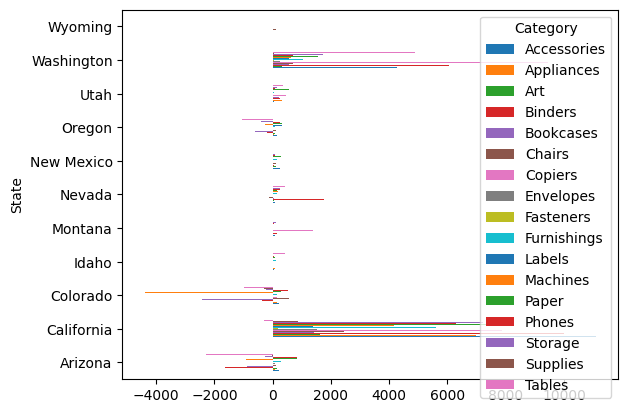

In [ ]:
df_state_cat_profit.plot.barh()

<Axes: ylabel='State'>

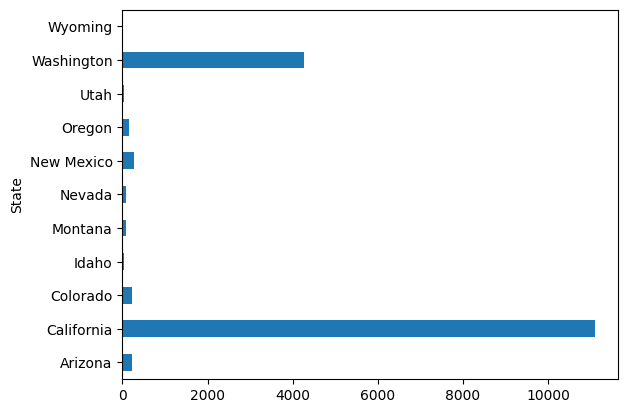

In [ ]:
df_state_cat_profit.iloc[:,0].plot.barh()

In [ ]:
df_state_cat_profit.shape

(11, 17)

In [ ]:
list(df_state_cat_profit.columns)

['Accessories',
 'Appliances',
 'Art',
 'Binders',
 'Bookcases',
 'Chairs',
 'Copiers',
 'Envelopes',
 'Fasteners',
 'Furnishings',
 'Labels',
 'Machines',
 'Paper',
 'Phones',
 'Storage',
 'Supplies',
 'Tables']

In [ ]:
len(list(df_state_cat_profit.columns))

17

In [ ]:
for idx,cols in enumerate(list(df_state_cat_profit.columns)):
  print(idx,cols)

0 Accessories
1 Appliances
2 Art
3 Binders
4 Bookcases
5 Chairs
6 Copiers
7 Envelopes
8 Fasteners
9 Furnishings
10 Labels
11 Machines
12 Paper
13 Phones
14 Storage
15 Supplies
16 Tables


<Figure size 1400x1400 with 0 Axes>

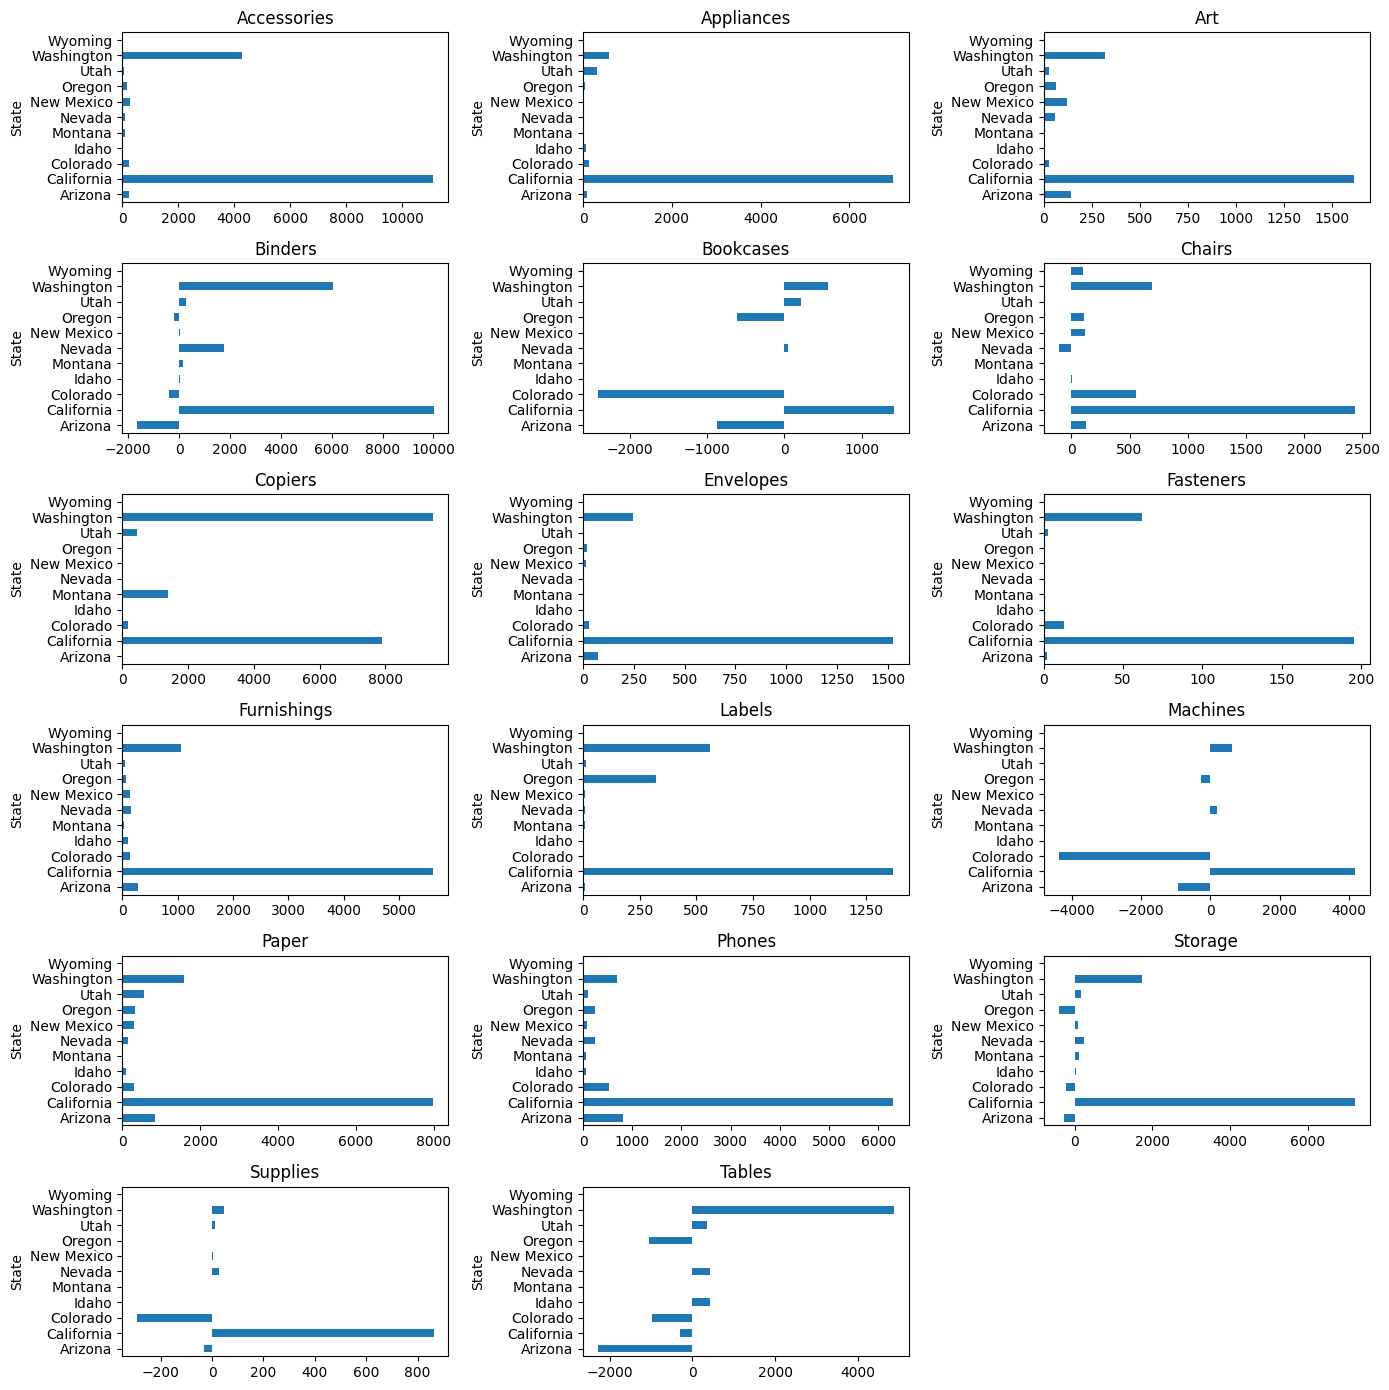

In [ ]:

plt.figure(figsize=(14,14))


plt.figure(figsize = (14,14))

for idx,cols in enumerate(list(df_state_cat_profit.columns)):
  plt.subplot(6,3,idx+1)
  df_state_cat_profit.loc[: , cols].plot.barh()
  plt.title(cols)

plt.tight_layout()
plt.show()

**Create Plot to show Number of quantity sold of each category in each state**

In [ ]:
state_quantity=df.groupby(['State','Category'])['Quantity'].sum().unstack().fillna(0)
state_quantity

Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
State,,,,,,,,,,,,,,,,,
Arizona,85.0,21.0,47.0,155.0,18.0,52.0,0.0,28.0,23.0,82.0,9.0,9.0,124.0,79.0,78.0,16.0,36.0
California,568.0,346.0,644.0,1057.0,198.0,466.0,60.0,149.0,148.0,751.0,349.0,86.0,1091.0,689.0,637.0,145.0,281.0
Colorado,76.0,38.0,32.0,112.0,41.0,53.0,1.0,16.0,12.0,92.0,5.0,13.0,64.0,59.0,51.0,14.0,14.0
Idaho,3.0,4.0,0.0,12.0,0.0,3.0,0.0,0.0,0.0,10.0,0.0,0.0,13.0,9.0,5.0,0.0,5.0
Montana,6.0,0.0,0.0,6.0,0.0,0.0,5.0,0.0,0.0,7.0,2.0,0.0,5.0,7.0,18.0,0.0,0.0
Nevada,5.0,9.0,16.0,32.0,2.0,3.0,0.0,0.0,1.0,22.0,3.0,10.0,27.0,18.0,5.0,5.0,10.0
New Mexico,23.0,0.0,17.0,16.0,0.0,7.0,0.0,5.0,0.0,12.0,5.0,0.0,28.0,18.0,17.0,3.0,0.0
Oregon,49.0,17.0,51.0,70.0,9.0,27.0,0.0,10.0,8.0,15.0,36.0,8.0,79.0,50.0,32.0,20.0,18.0
Utah,19.0,3.0,10.0,43.0,10.0,0.0,5.0,0.0,7.0,11.0,10.0,0.0,53.0,21.0,14.0,5.0,8.0


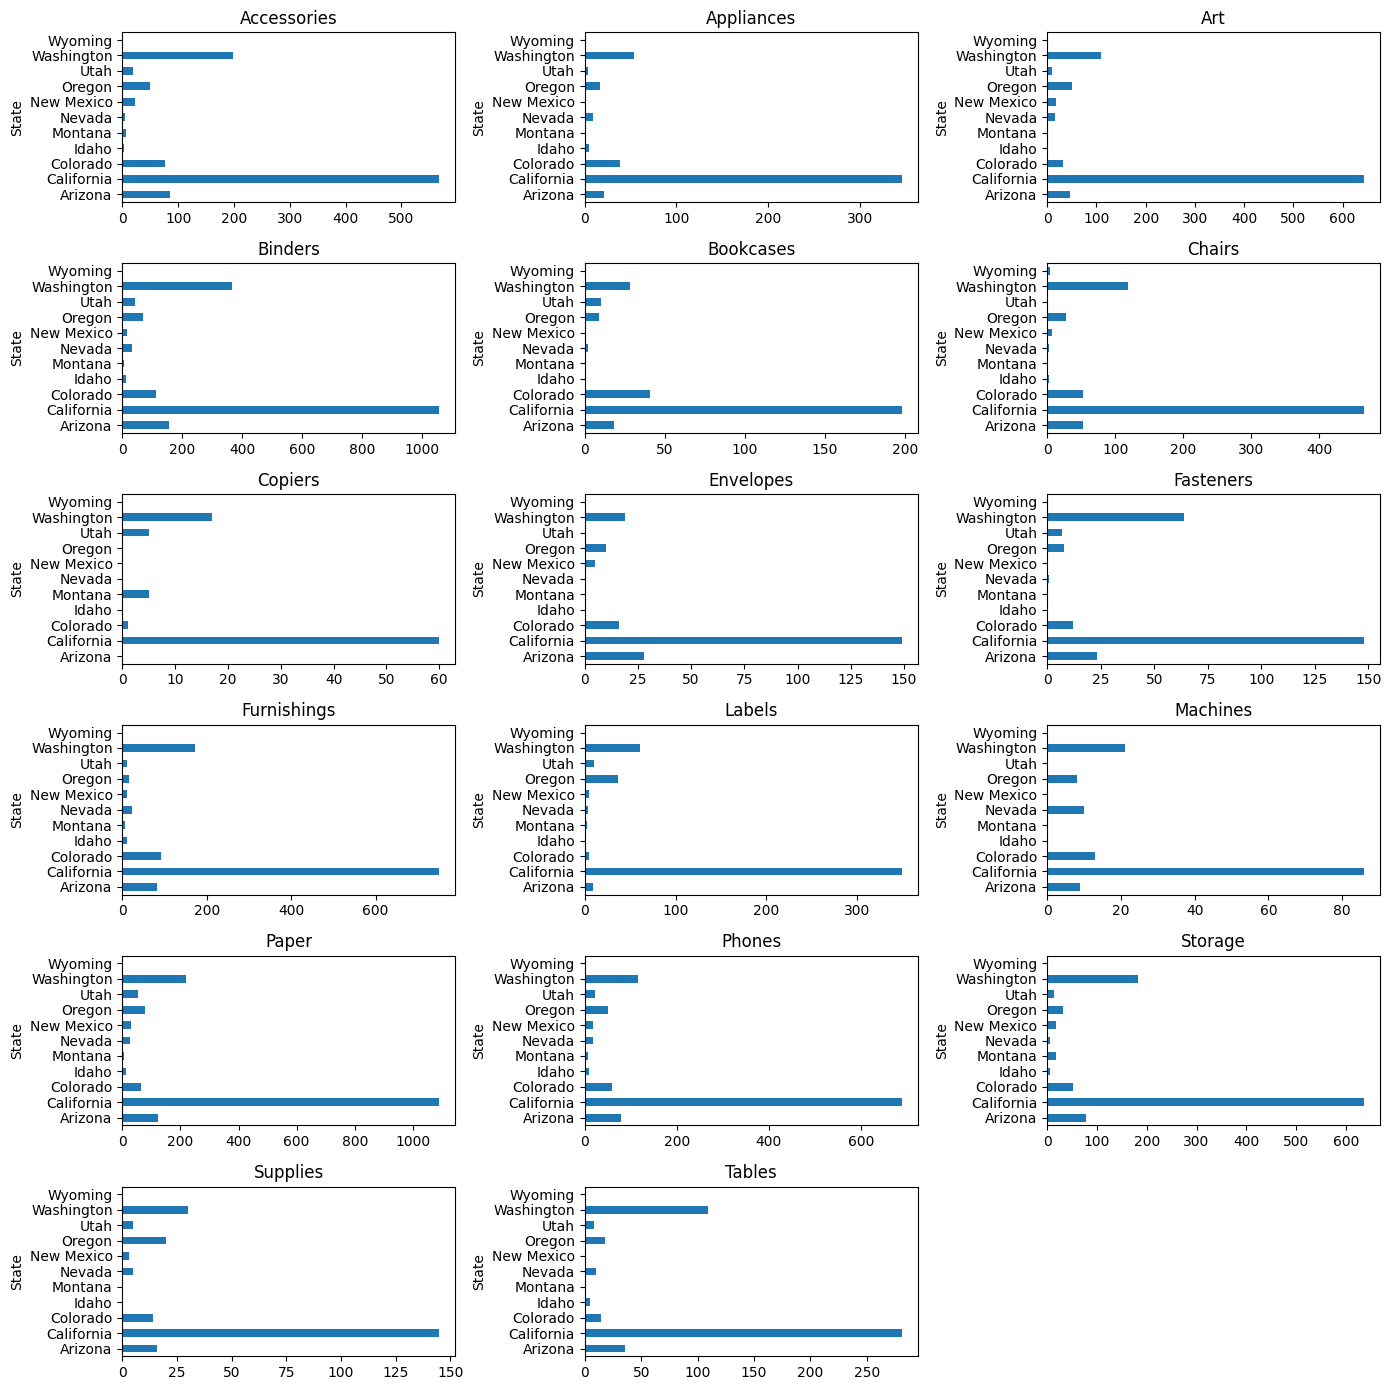

In [ ]:
plt.figure(figsize=(14,14))

for idx,cols in enumerate(list(state_quantity.columns)):
  plt.subplot(6,3,idx+1)
  state_quantity.loc[:,cols].plot.barh()
  plt.title(cols)
  plt.tight_layout()



In [ ]:
#list(state_quantity.iterrows())

In [ ]:
state_quantity.shape

(11, 17)

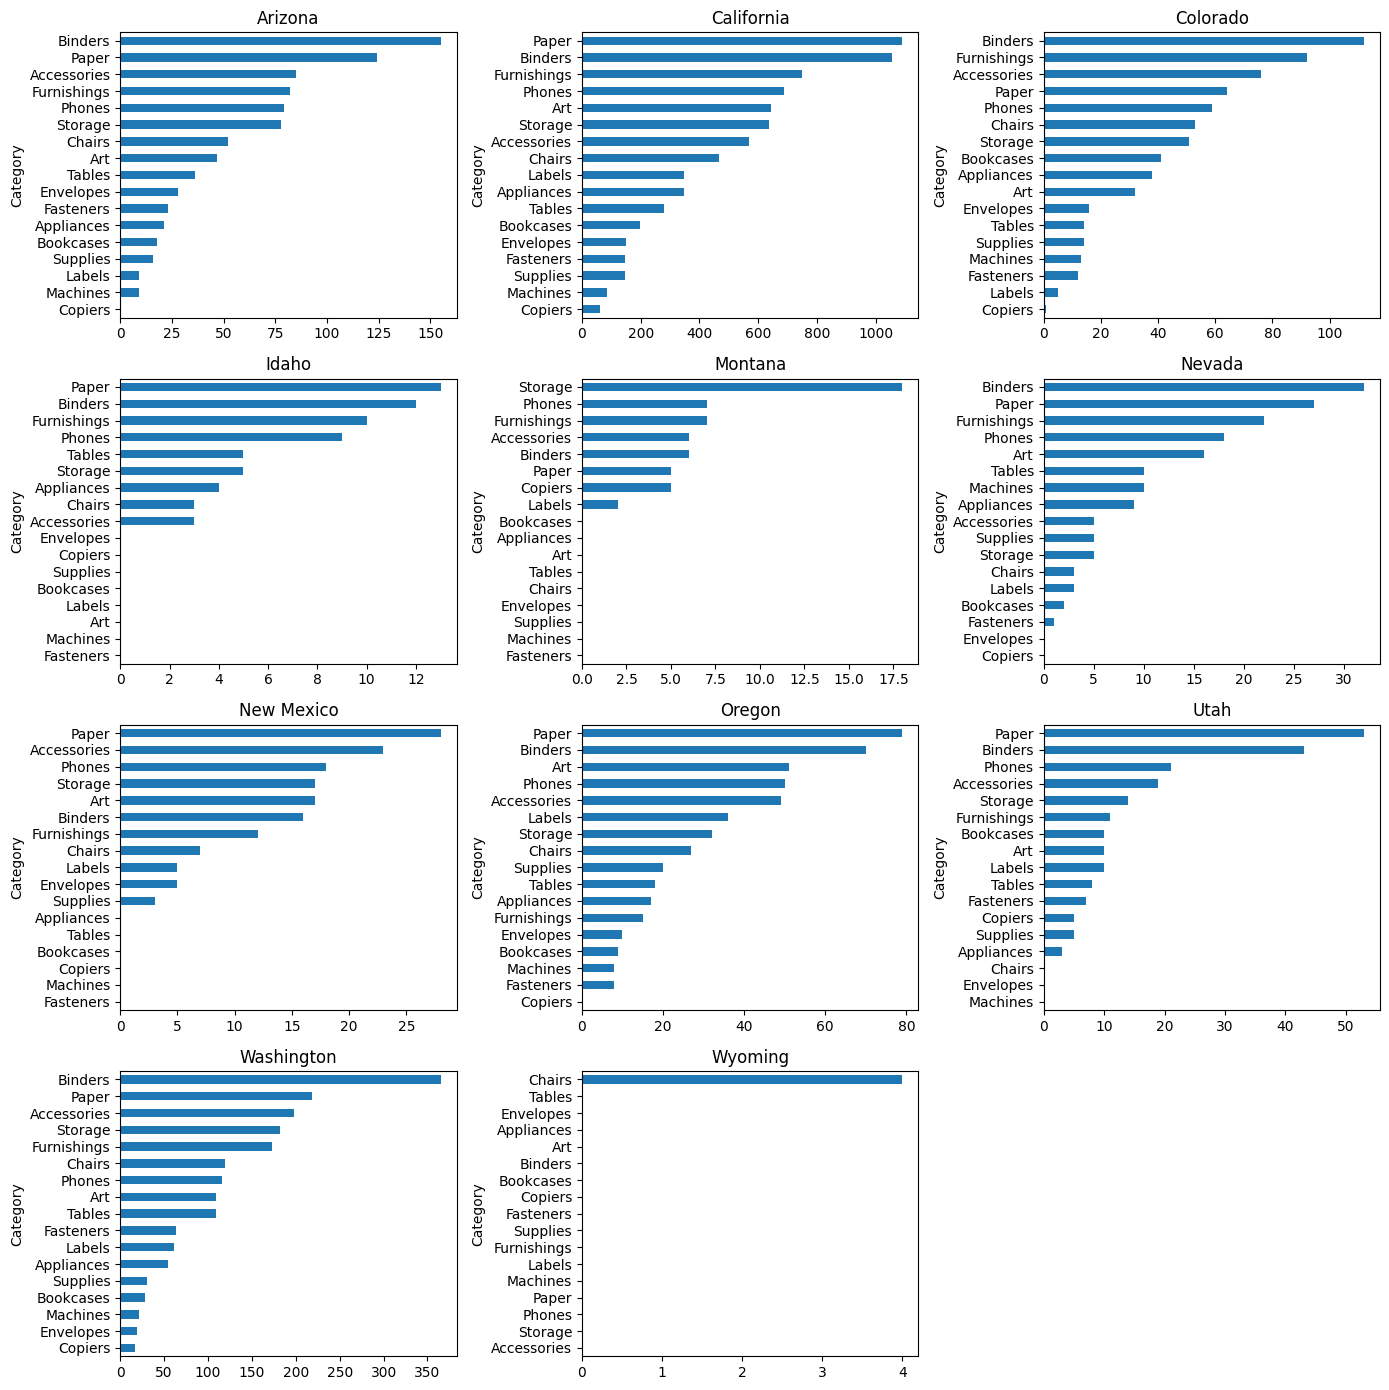

In [ ]:
plt.figure(figsize=(14,14))
i=0
for state,data in state_quantity.iterrows():
  i=i+1

  plt.subplot(4,3,i)

  data=data.sort_values()
  data.plot.barh()
  plt.title(state)
  plt.tight_layout()


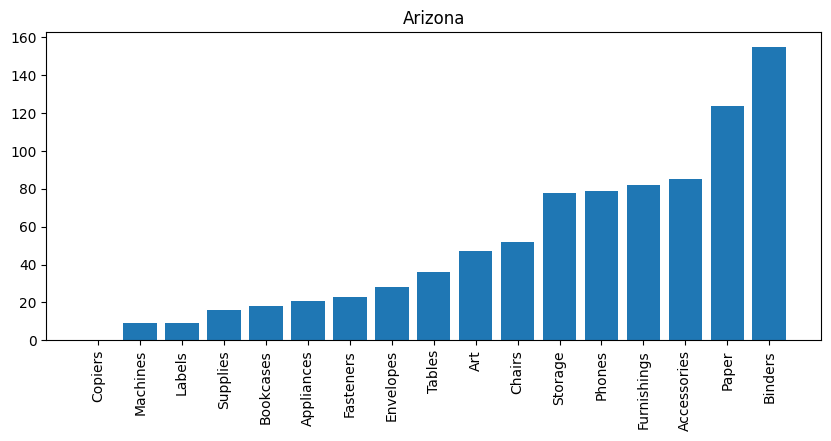

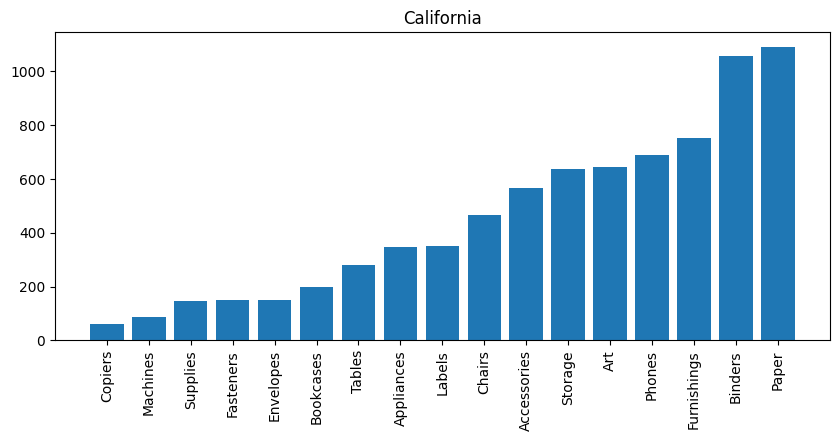

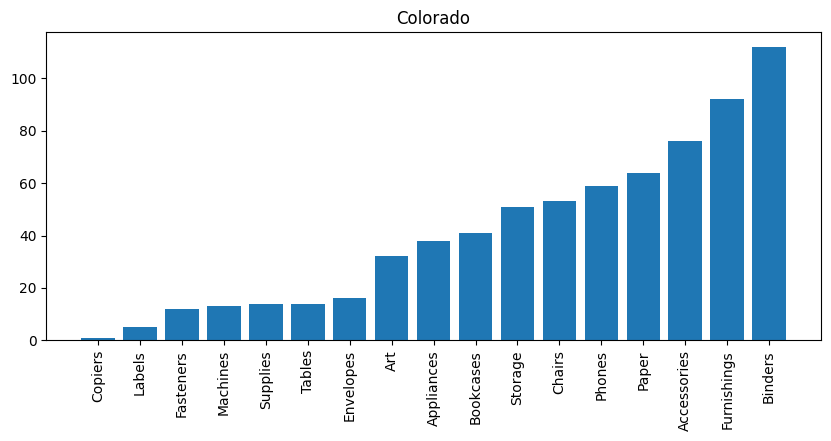

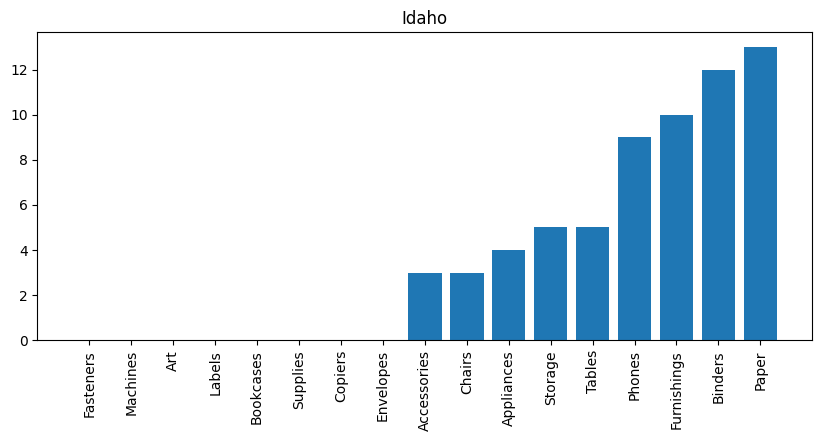

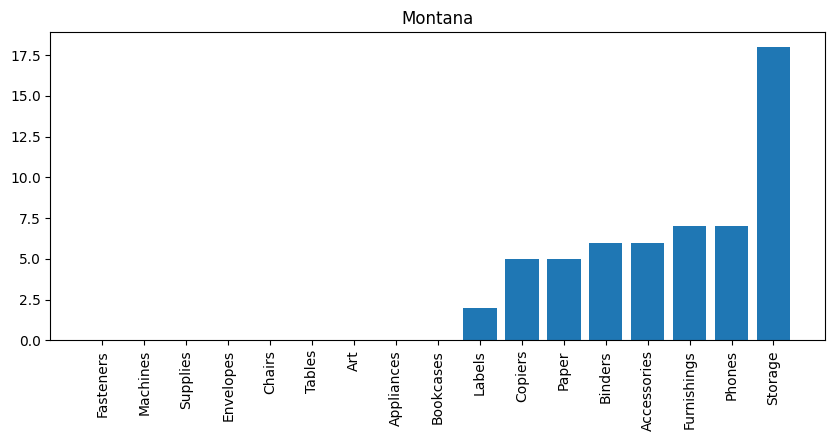

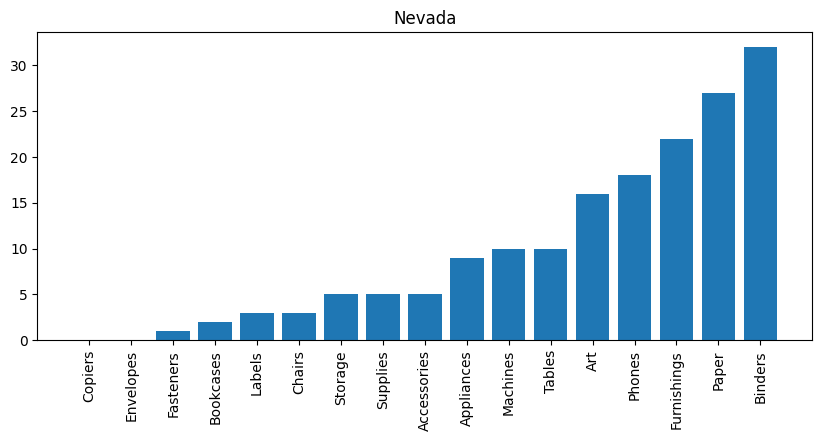

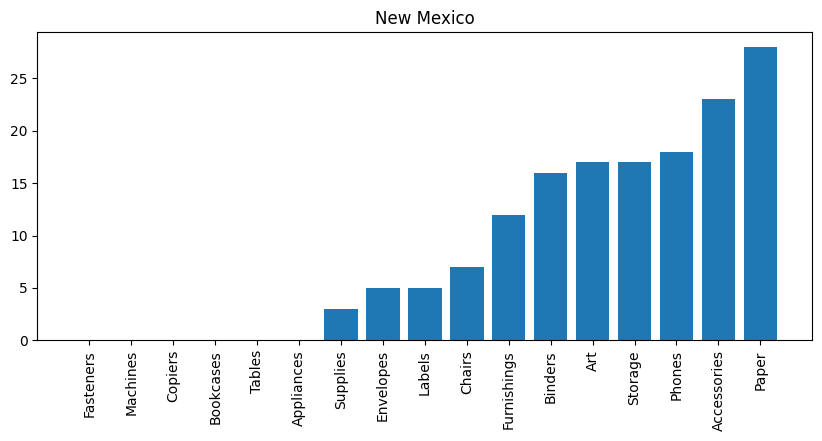

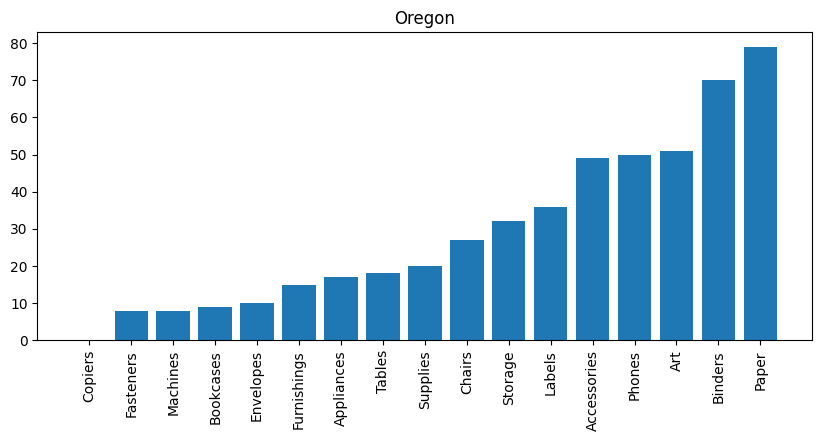

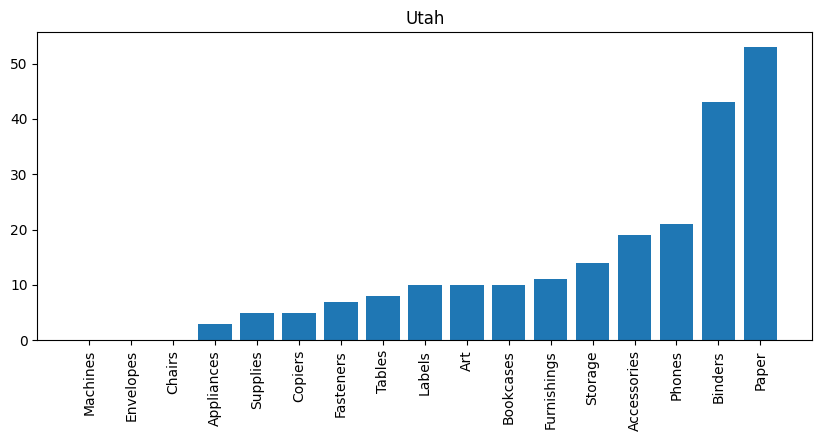

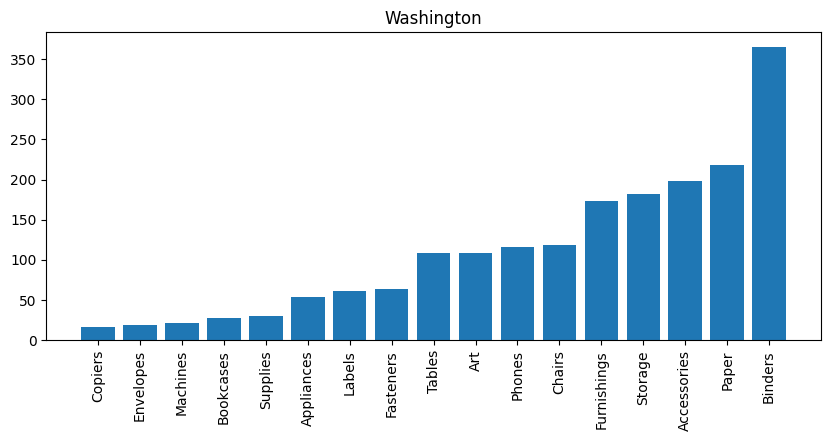

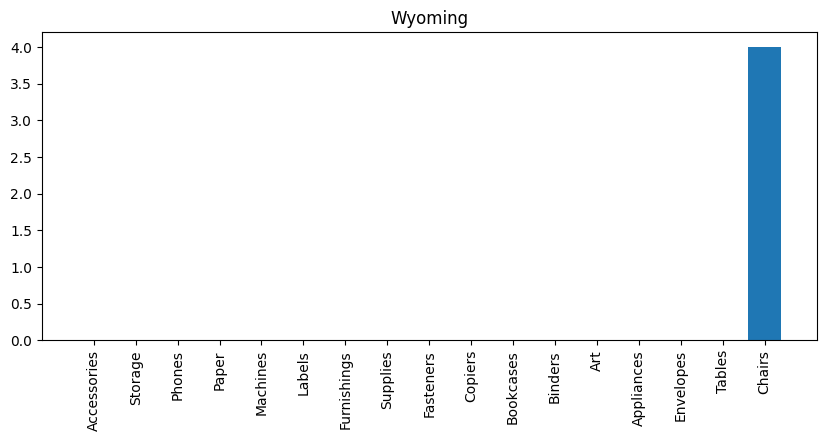

In [ ]:
for state,data in state_quantity.iterrows():
  #print(state , data)
  data = data.sort_values()
  plt.figure(figsize = (10,4))
  plt.bar(data.index , data.values)
  plt.title(state)
  plt.xticks(rotation = 90)
  plt.show()

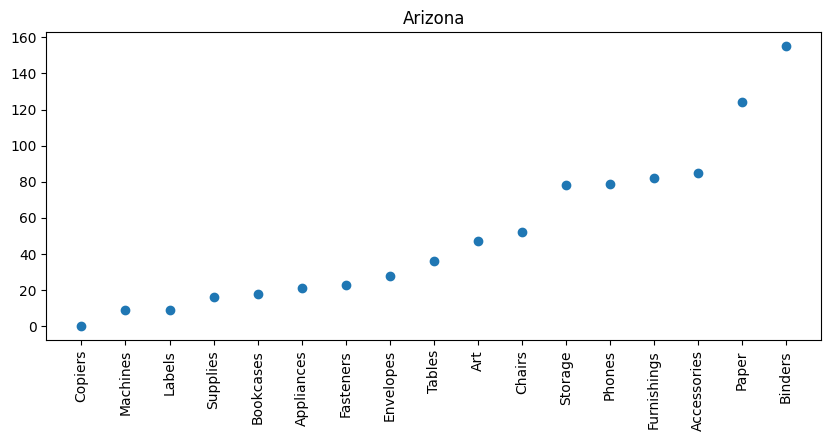

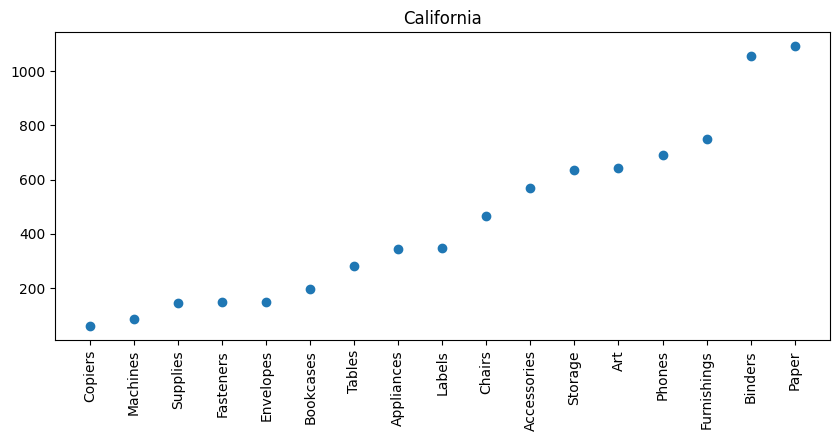

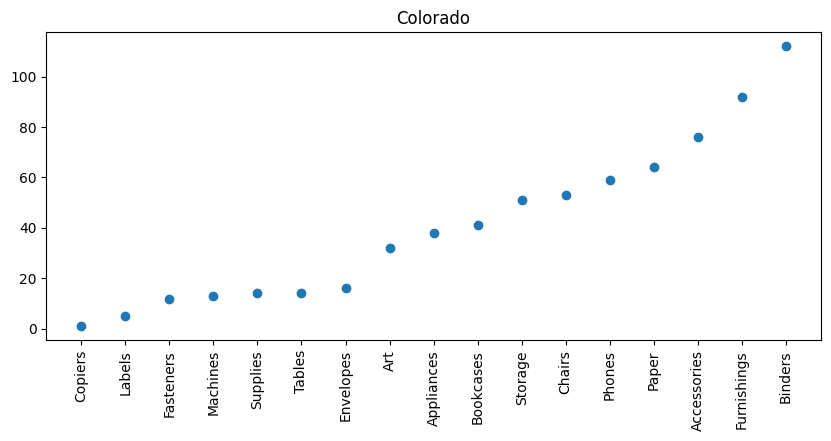

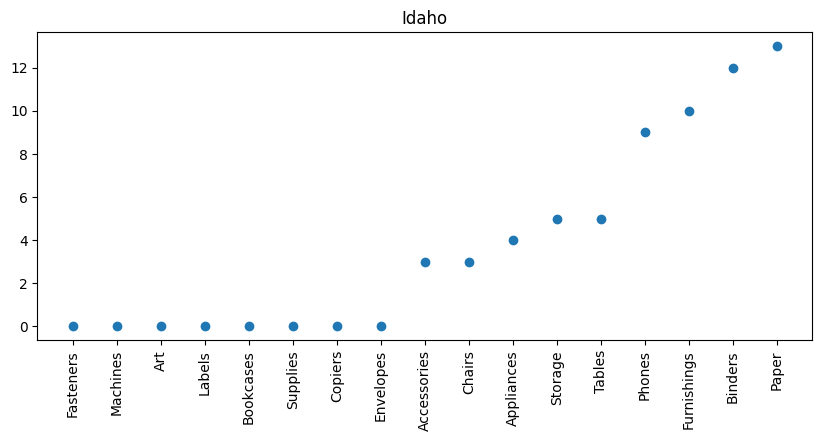

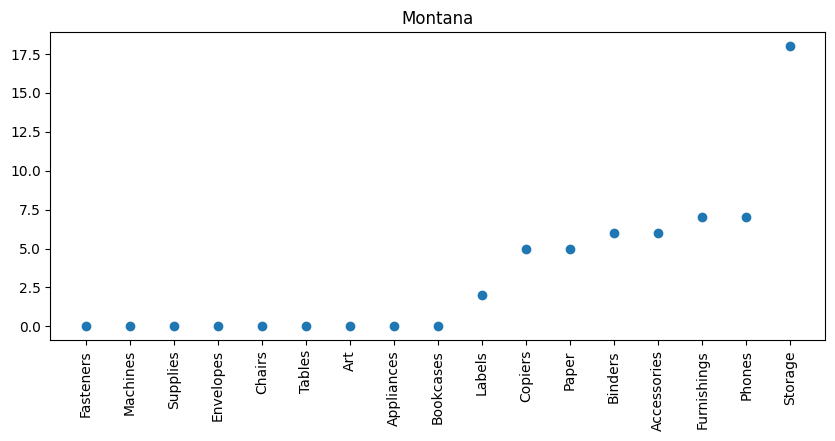

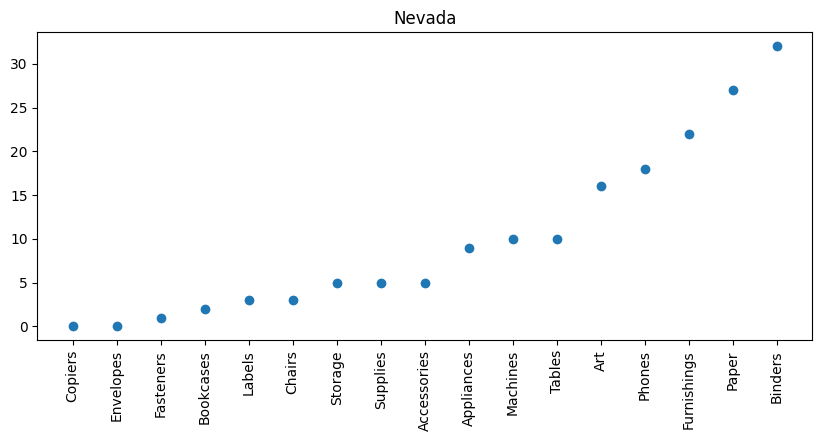

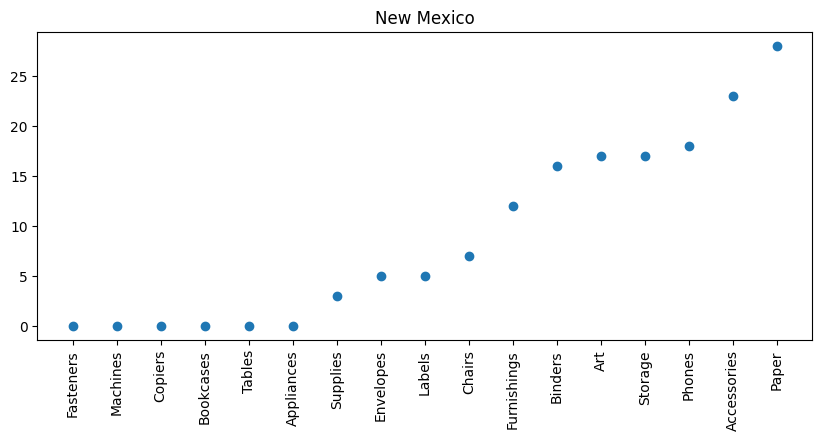

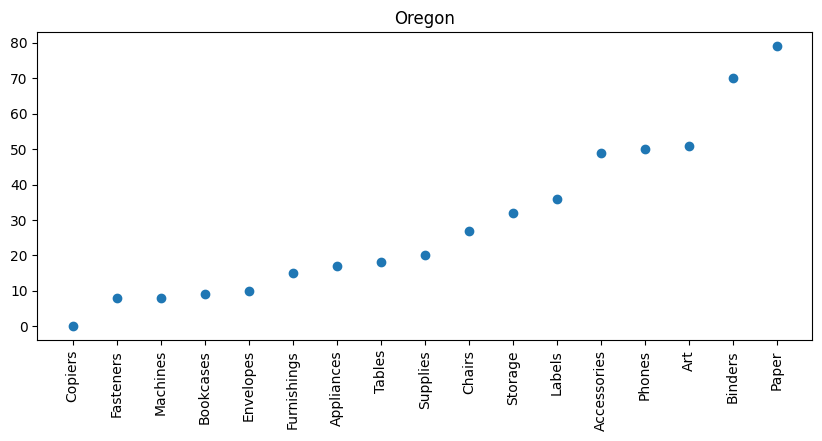

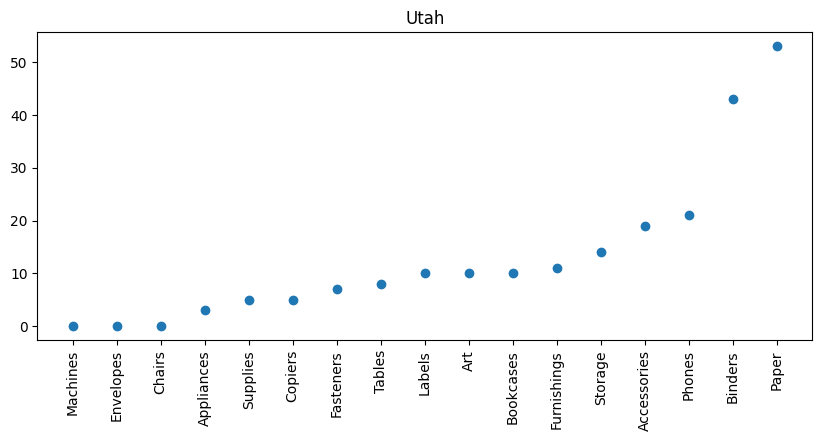

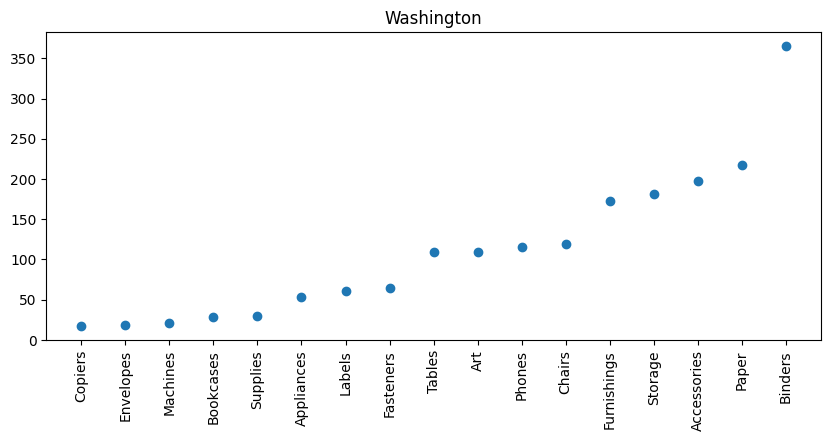

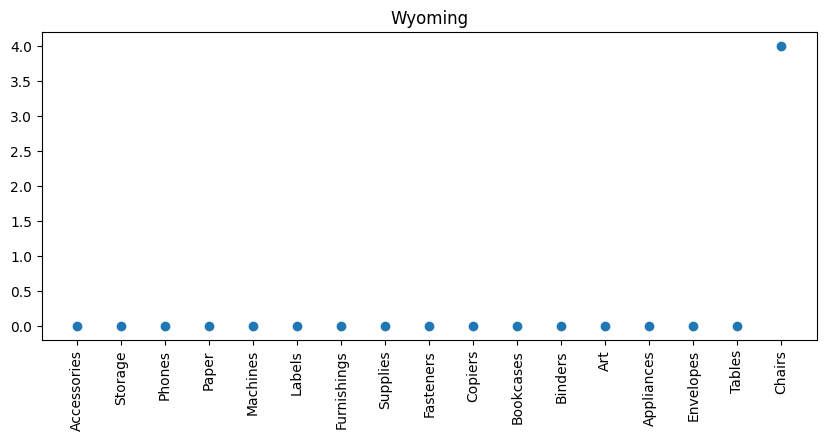

In [ ]:
for state,data in state_quantity.iterrows():
  #print(state , data)
  data = data.sort_values()
  plt.figure(figsize = (10,4))
  plt.scatter(data.index , data.values)
  plt.title(state)
  plt.xticks(rotation = 90)
  plt.show()

1. State wise order processing time
2. Plot the insights

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Shipping time,o_day,o_month,o_year,Quater,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,4,13,6,2013,Q1,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q1,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q1,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q1,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q1,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [ ]:
# average procesing time of each state
state_st=df.groupby('State')['Shipping time'].mean().sort_values(ascending=False)
state_st

State
Wyoming       5.000000
Montana       4.600000
New Mexico    4.513514
Nevada        4.384615
Utah          4.358491
Oregon        4.314516
Arizona       4.071429
Washington    3.974308
California    3.868066
Colorado      3.681319
Idaho         3.666667
Name: Shipping time, dtype: float64

<Axes: xlabel='State'>

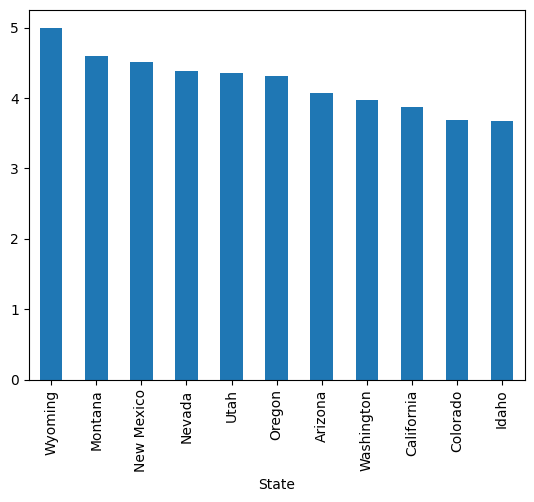

In [ ]:
state_st.plot.bar()

Is processing time affecting sales or profit..?

<Axes: xlabel='Shipping time'>

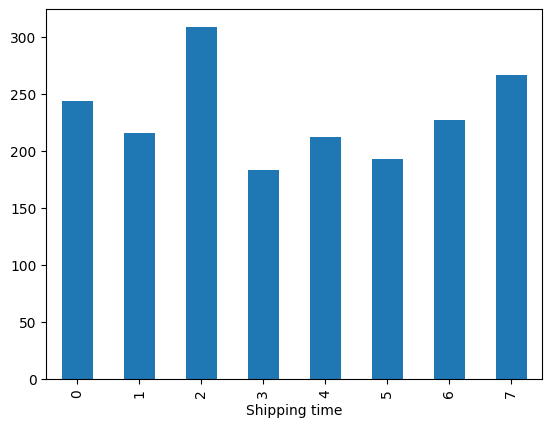

In [ ]:
df.groupby('Shipping time')['Sales'].mean().plot.bar()

<Axes: xlabel='Shipping time'>

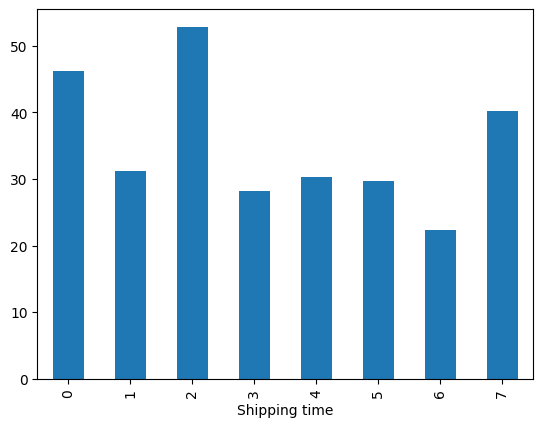

In [ ]:
df.groupby('Shipping time')['Profit'].mean().plot.bar()

In [ ]:
df['Shipping time'].value_counts()

Shipping time
4    832
5    689
2    450
6    361
3    308
7    238
0    166
1    159
Name: count, dtype: int64

<Axes: xlabel='Shipping time'>

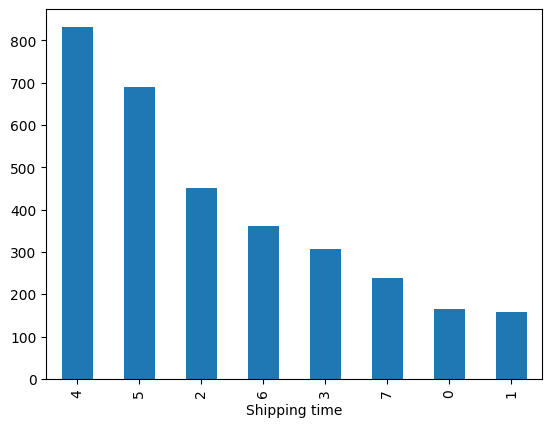

In [ ]:
df['Shipping time'].value_counts().plot.bar()



*   Variations of Sales value because of Processing time in each state




*   Visualise the insights



In [ ]:
processingtimestate=df.groupby(['Shipping time','State'])['Sales'].mean().unstack().fillna(0)
processingtimestate

State,Arizona,California,Colorado,Idaho,Montana,Nevada,New Mexico,Oregon,Utah,Washington,Wyoming
Shipping time,,,,,,,,,,,
0,171.087333,252.891667,266.632500,0.000000,8.290,475.940000,255.850000,0.000000,48.960000,256.290588,0.00
1,163.099000,217.188061,107.226667,0.000000,0.000,568.723333,159.990000,150.032500,75.860000,306.180526,0.00
2,112.056667,305.580172,154.279655,192.135714,0.000,62.080000,31.000000,159.660500,465.662500,485.910263,0.00
3,126.085789,211.159947,98.477568,89.970000,39.900,96.327500,0.000000,116.603077,35.190000,200.450000,0.00
4,169.677907,209.327898,196.790426,243.355000,187.116,336.419000,69.171000,141.439545,280.551538,249.540233,0.00
5,161.513793,194.497986,86.137917,244.355000,839.096,960.190000,137.716471,72.847931,275.452941,174.792200,1603.14
6,198.902000,227.315962,343.515909,21.310000,0.000,234.218333,145.392000,206.364242,54.424615,259.101042,0.00
7,141.906129,268.310472,394.754286,0.000000,136.700,629.284286,545.850000,29.226667,0.000000,285.687966,0.00


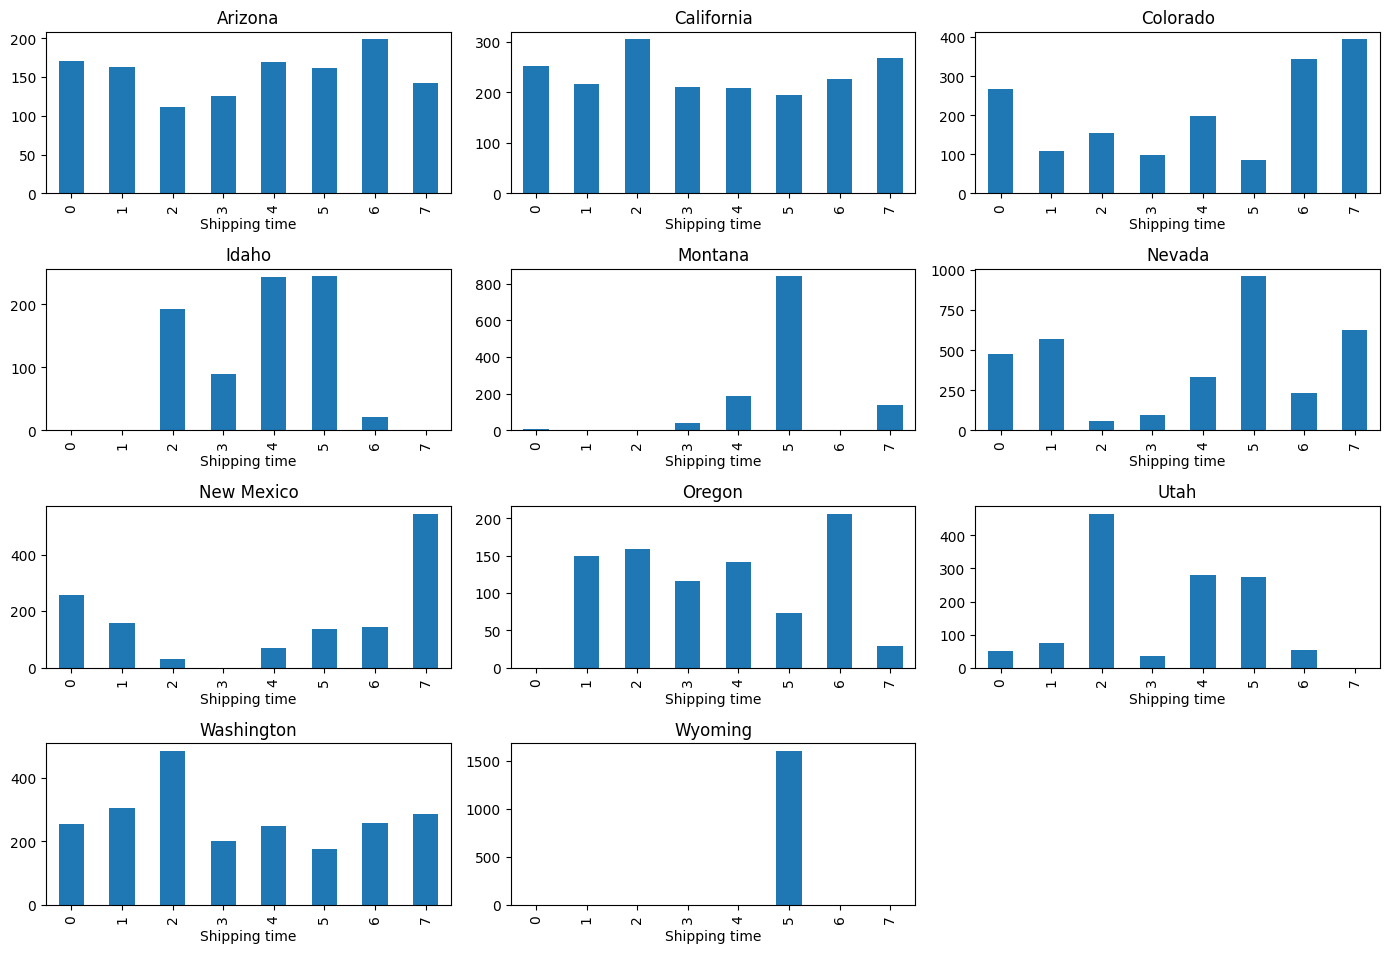

In [ ]:
plt.figure(figsize=(14,14))

for idx,cols in enumerate(list(processingtimestate.columns)):
  plt.subplot(6,3,idx+1)
  processingtimestate.loc[:,cols].plot.bar()
  plt.title(cols)
  plt.tight_layout()

* Craete a column representing profit and loss
* Scatter plot representing Sales vs Profit, green color for profit, red color for loss.

In [ ]:
df['p/L']=df['Profit'].apply(lambda x : 'g' if x > 0 else 'y' if x == 0 else 'r')
df.head()

,Order ID,Order Date,Ship Date,Shipping time,o_day,o_month,o_year,Quater,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,p/L
0,CA-2013-138688,2013-06-13,2013-06-17,4,13,6,2013,Q1,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,g
1,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q1,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,g
2,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q1,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,g
3,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q1,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,g
4,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q1,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,g


In [ ]:
df['p/L'].value_counts()


p/L
g    2863
r     318
y      22
Name: count, dtype: int64

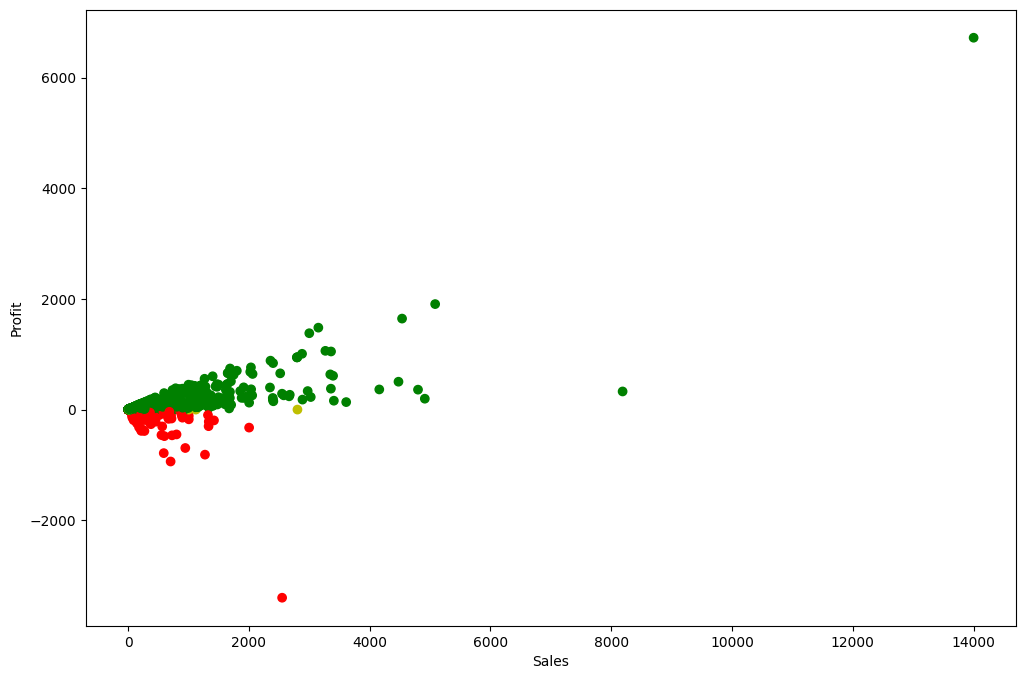

In [ ]:
plt.figure(figsize=(12,8))


plt.scatter(df.Sales ,df.Profit,c=df['p/L'])

plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()



*   Compare City wise Average Sales & Average Profit

* Average Sales & Profit each year, plot - bar & line

* Average Sales & Profit each month, plot - bar & line

* Analyse and Visualise Sales of each category for each year

* Quartely Sales & Profit Analysis

* Average Sales and Profit Analysis for each state in every quarter




In [ ]:
df.head(2)

,Order ID,Order Date,Ship Date,Shipping time,o_day,o_month,o_year,Quater,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,p/L
0,CA-2013-138688,2013-06-13,2013-06-17,4,13,6,2013,Q1,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,g
1,CA-2011-115812,2011-06-09,2011-06-14,5,9,6,2011,Q1,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,g


In [ ]:
city_sales_profit=df.groupby('City')[['Sales','Profit']].mean()
city_sales_profit

,Sales,Profit
City,,
Albuquerque,158.583571,45.292143
Anaheim,295.810370,45.702963
Antioch,19.440000,9.330000
Apple Valley,273.584286,40.517143
Arvada,125.850000,14.962500
...,...,...
Westminster,225.097059,44.923529
Whittier,444.770000,44.480000
Woodland,88.220000,11.130000


In [ ]:
city_sales_profit.sort_values('Profit').head(50)

,Sales,Profit
City,,
Louisville,211.267083,-141.924167
Yuma,210.220000,-116.497500
Pueblo,210.867500,-112.622500
Littleton,72.290000,-98.800000
Ontario,283.920000,-46.140000
Phoenix,174.607460,-44.299206
Colorado Springs,147.761200,-38.267200
Fort Collins,133.608571,-36.098571
Commerce City,146.350000,-32.930000


<Axes: xlabel='City'>

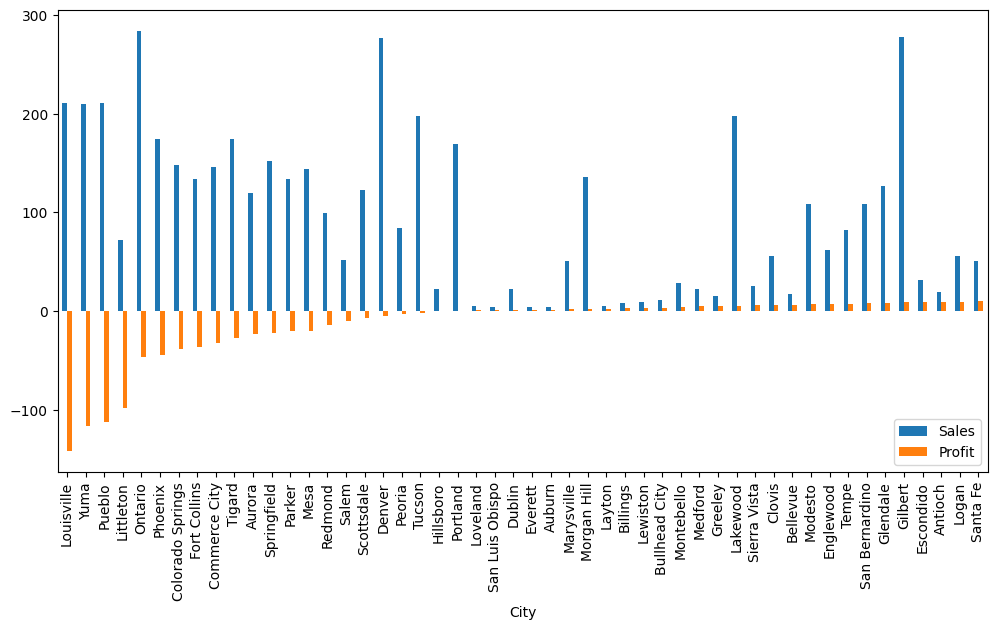

In [ ]:
city_sales_profit.sort_values('Profit').head(50).plot.bar(figsize=(12,6))

<Axes: xlabel='City'>

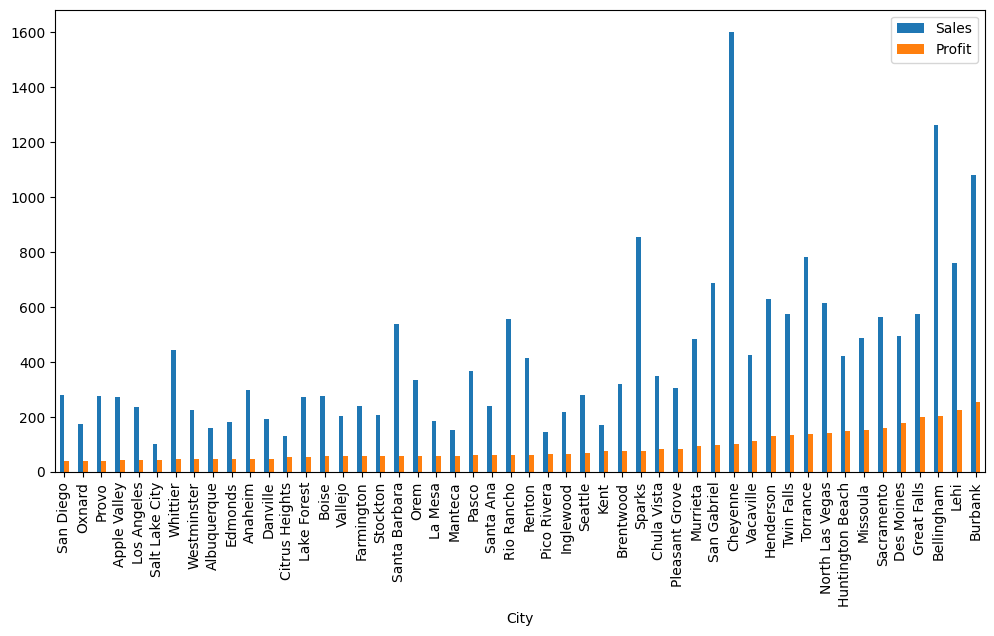

In [ ]:
city_sales_profit.sort_values('Profit').tail(50).plot.bar(figsize=(12,6))

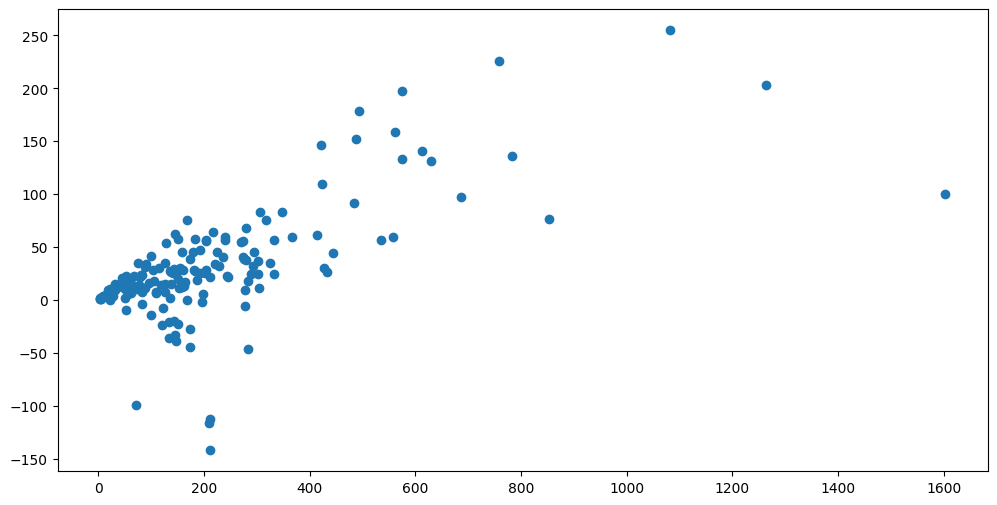

In [ ]:
plt.figure(figsize=(12,6))

plt.scatter(city_sales_profit.Sales,city_sales_profit.Profit)
plt.show()

In [ ]:
city_sales_profit.corr()


,Sales,Profit
Sales,1.000000,0.683634
Profit,0.683634,1.000000


In [ ]:
df.head(1)

,Order ID,Order Date,Ship Date,Shipping time,o_day,o_month,o_year,Quater,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit,p/L
0,CA-2013-138688,2013-06-13,2013-06-17,4,13,6,2013,Q1,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,g


In [ ]:
df[['Shipping time', 'Sales','Quantity','Profit']].corr()

,Shipping time,Sales,Quantity,Profit
Shipping time,1.000000,-0.019958,0.047754,-0.028638
Sales,-0.019958,1.000000,0.214665,0.647477
Quantity,0.047754,0.214665,1.000000,0.093240
Profit,-0.028638,0.647477,0.093240,1.000000


In [ ]:
x1 = df.Sales
x2 = df.Profit

n1 = ((x1 - x1.mean()) * (x2 - x2.mean())).sum()
d1 = np.sqrt(((x1 - x1.mean())**2).sum() * ((x2 - x2.mean())**2).sum())
c1 = n1/d1
print(c1)

0.6474772917300364


In [ ]:
year_df=df.groupby('o_year')[['Sales','Profit']].mean()
year_df

,Sales,Profit
o_year,,
2011,223.726278,30.356641
2012,218.015950,31.919268
2013,233.428327,29.912484
2014,228.055077,39.946297


<Axes: xlabel='o_year'>

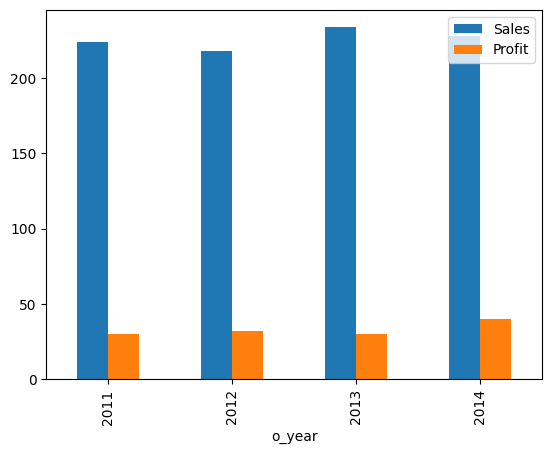

In [ ]:
year_df.plot.bar()

<Axes: xlabel='o_year'>

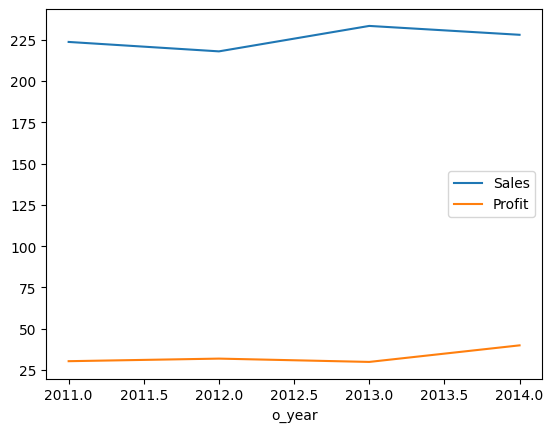

In [ ]:
year_df.plot.line()

In [ ]:
month_df=df.groupby('o_month')[['Sales','Profit']].mean()
month_df

,Sales,Profit
o_month,,
1,230.728056,42.273519
2,164.329697,27.269192
3,361.503614,79.677475
4,218.575990,7.442344
5,215.813762,32.383333
6,239.012512,38.078768
7,288.870313,41.441116
8,246.749291,43.612795
9,183.412270,33.022180


<Axes: xlabel='o_month'>

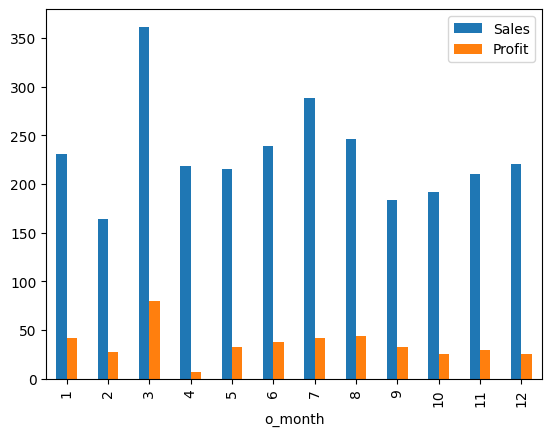

In [ ]:
month_df.plot.bar()

<Axes: xlabel='o_month'>

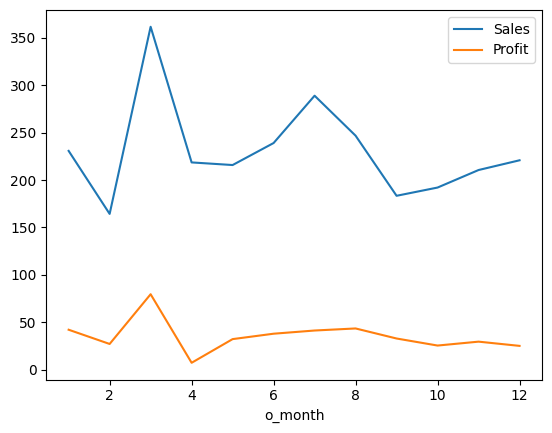

In [ ]:
month_df.plot.line()

* Analyse and Visualise Sales of each category for each year

In [ ]:
catyearsales=df.groupby(['Category','o_year'])['Sales'].mean().unstack().fillna(0)
catyearsales


o_year,2011,2012,2013,2014
Category,,,,
Accessories,162.295455,209.328824,276.471786,271.142292
Appliances,144.441923,286.117778,142.892857,286.550000
Art,55.405082,42.395417,25.374773,27.637938
Binders,164.091899,44.187500,90.226496,160.169581
Bookcases,436.328000,445.420000,547.807333,409.942414
Chairs,465.368913,578.049268,503.668387,438.740172
Copiers,1499.975000,1251.635000,1629.968333,2678.150909
Envelopes,54.799167,90.362667,77.930000,27.323500
Fasteners,13.840000,9.967857,17.581333,10.570870


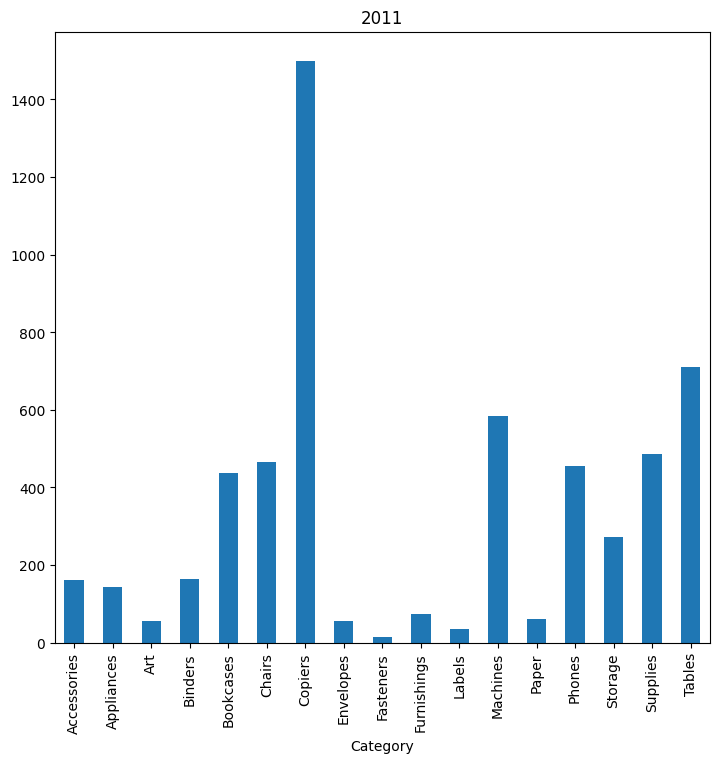

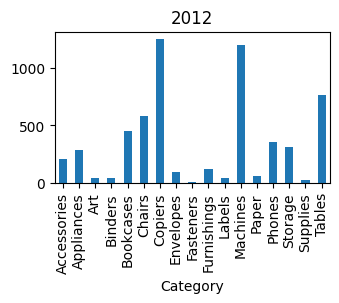

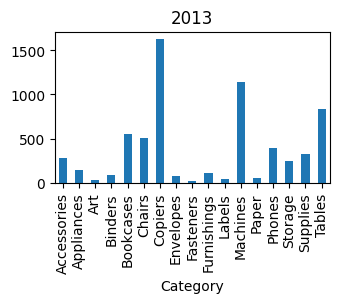

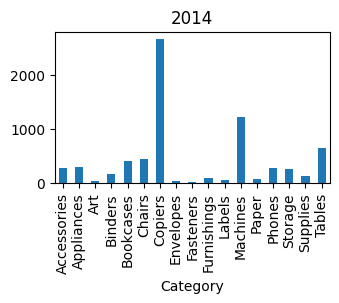

In [ ]:
plt.figure(figsize=(14,14))

for i,cols in enumerate(list(catyearsales.columns)):
  plt.subplot(2,2,i+1)
  catyearsales.loc[:,cols].plot.bar()
  plt.title(cols)
  plt.tight_layout()
  plt.show()

<Axes: xlabel='Category'>

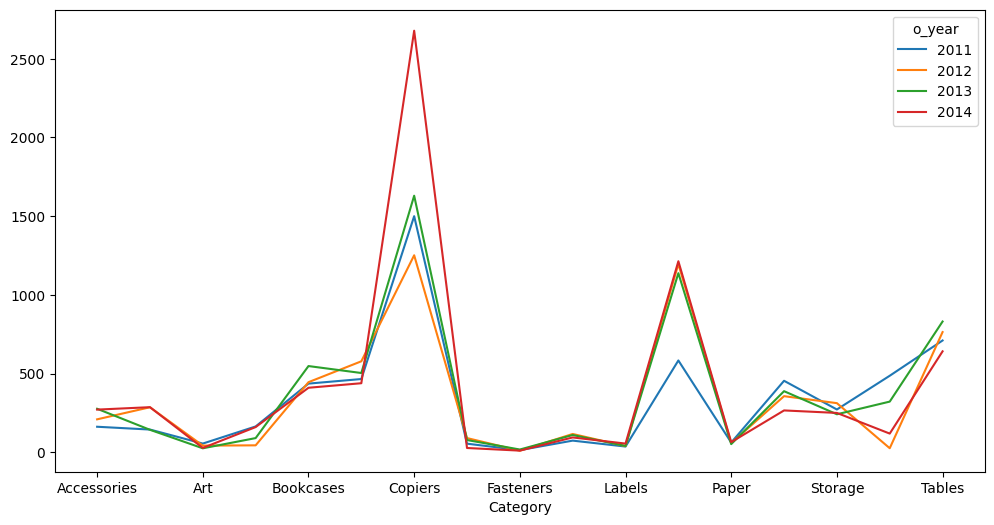

In [ ]:
catyearsales.plot.line(figsize=(12,6))

<Axes: xlabel='Category'>

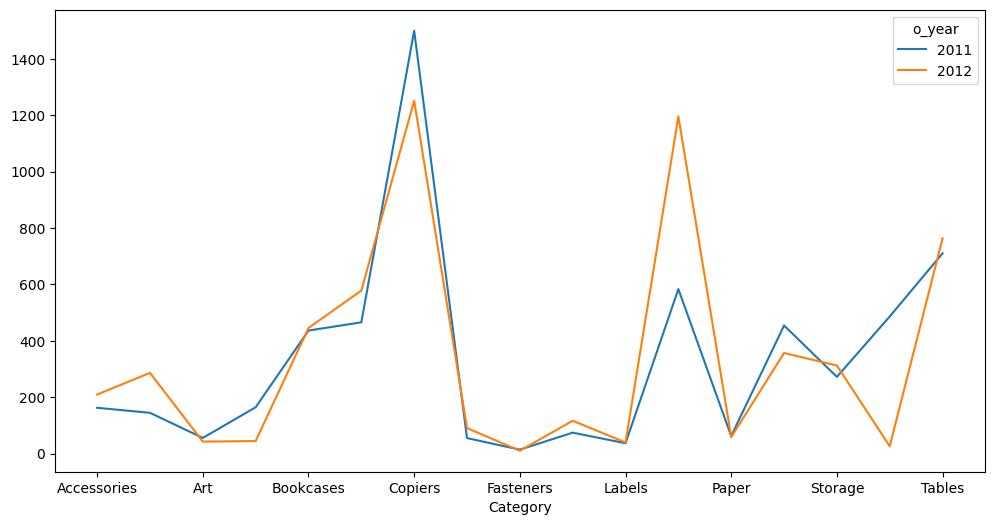

In [ ]:
catyearsales[[2011,2012]].plot.line(figsize=(12,6))

* Quartely Sales & Profit Analysis


* Average Sales and Profit Analysis for each state in every quarter

In [ ]:
quater_df=df.groupby('Quater')[['Profit','Sales']].mean()
quater_df

,Profit,Sales
Quater,,
Q1,26.379207,224.474413
Q2,37.979772,226.435244
Q3,26.890995,210.458278
Q4,57.115012,279.244499


<Axes: xlabel='Quater'>

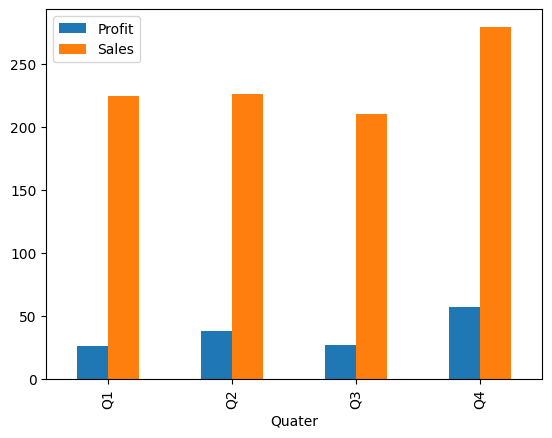

In [ ]:
quater_df.plot.bar()

In [ ]:
state_quater_sales=df.groupby(['State','Quater'])['Sales'].mean().unstack().fillna(0)
state_quater_sales.head()

Quater,Q1,Q2,Q3,Q4
State,,,,
Arizona,133.482830,164.216970,175.907442,117.951053
California,237.826633,233.788657,211.654899,255.353433
Colorado,238.890606,125.378889,176.045952,242.400909
Idaho,219.975000,310.520000,198.431111,17.340000
Montana,136.700000,18.096667,297.306667,705.506667


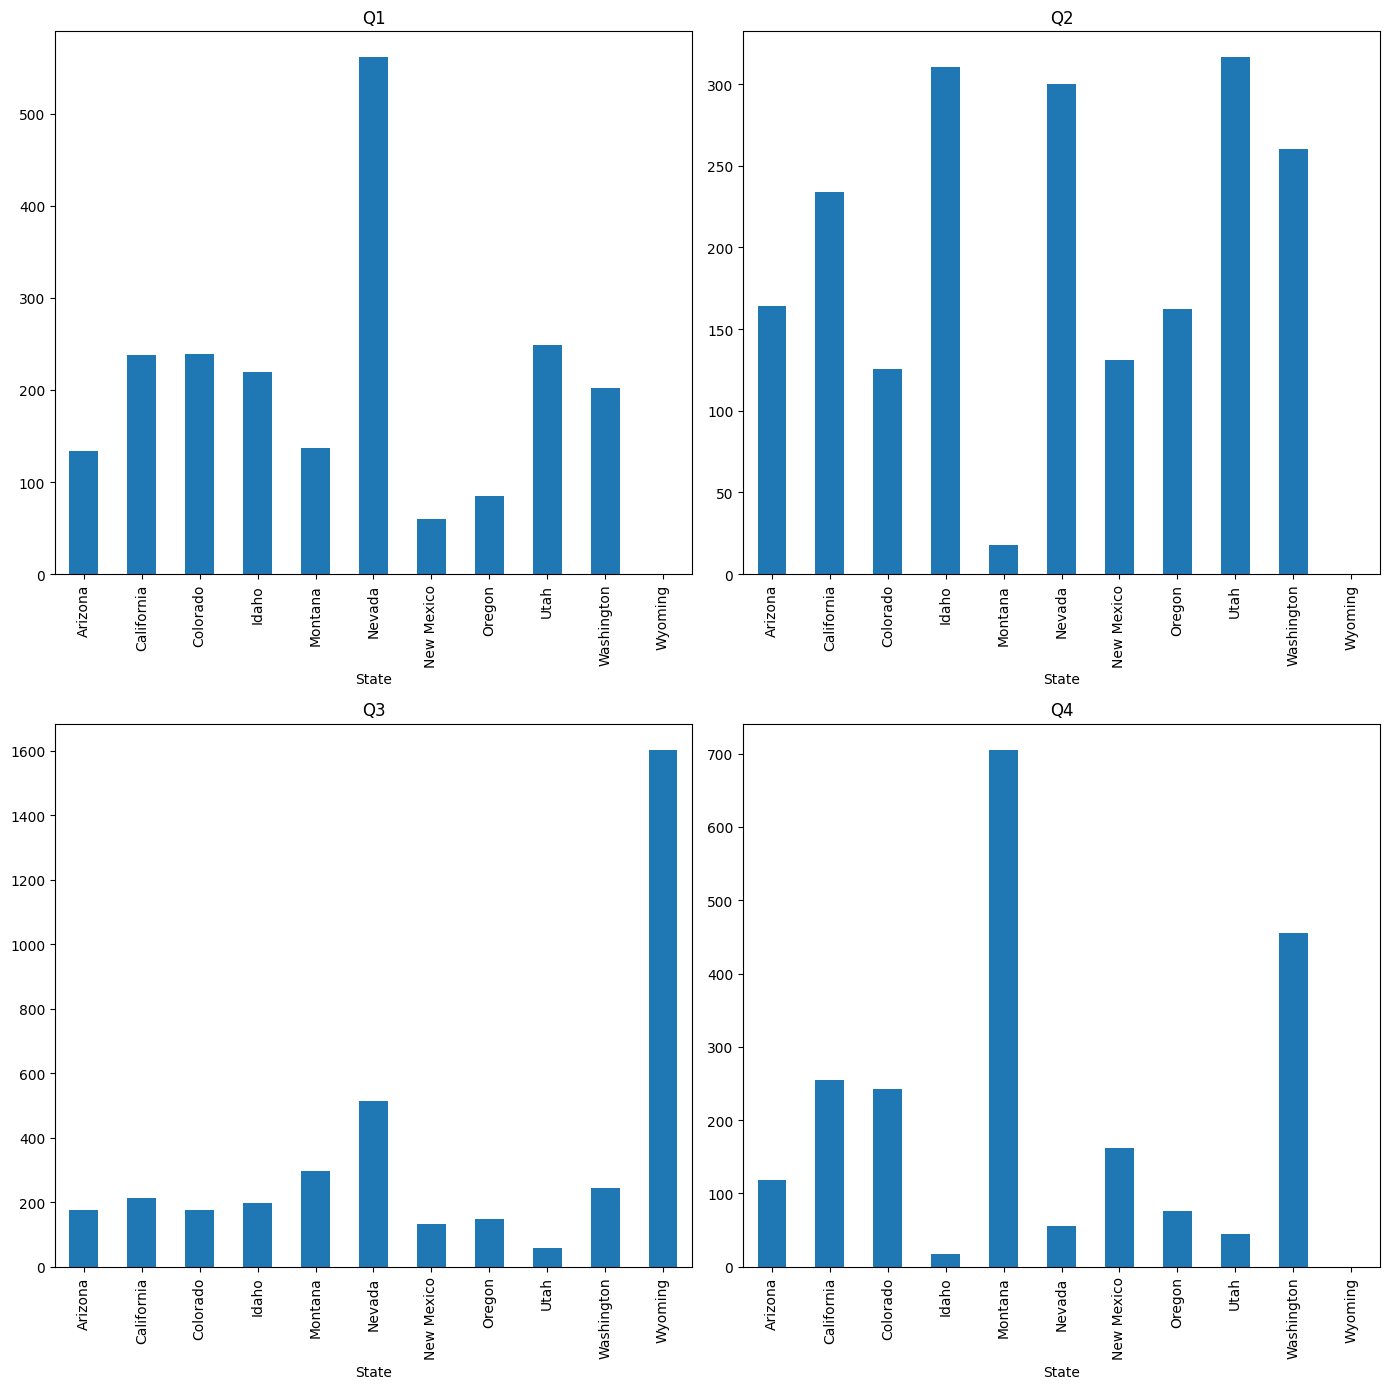

In [ ]:
plt.figure(figsize = (14,14))

for i,cols in enumerate(list(state_quater_sales.columns)):
  #print(i , cols)
  plt.subplot(2,2,i+1)
  state_quater_sales.loc[:,cols].plot.bar()
  plt.title(cols)

plt.tight_layout()
plt.show()